Ryan: (maf) set to 0.05, minimum minor allele count (mac) set to
10, and minimum locus coverage (max-missing) set to 0.1. Only SNPs called in 100% of individuals; 2) SNPs with observed heterozygosity larger than 0.6 were removed to avoid paralogous loci in the dataset (Li et al.,
2014); 3) SNPs deviating from Hardy-Weinberg equilibrium (HWE, p-value < 0.01) in more
than one population were removed; 4) SNP pairs that showed linkage disequilibrium (LD) with r2> 0.2 were pruned

Bradburn: Call rates > 0.85, maf > 0.01 (or 0.05 in a pop)

In [1]:
vcf = "./maf05mac4het9m3R50_2/populations.snps.vcf"
suffix = "./maf05mac4het9m3R50_2/Making/"

In [154]:
%expand
module load vcftools/v0.1.17

vcftools --vcf {vcf} --recode --recode-INFO-all \
--min-alleles 2 \
--max-missing 0.85 \
--out {suffix}m85


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ./maf05mac4het9m3R50_2/populations.snps.vcf
	--recode-INFO-all
	--min-alleles 2
	--max-missing 0.85
	--out ./maf05mac4het9m3R50_2/Making/m85
	--recode

After filtering, kept 144 out of 144 Individuals
Outputting VCF file...
After filtering, kept 15327 out of a possible 30942 Sites
Run Time = 15.00 seconds


In [156]:
%expand
vcftools --vcf {suffix}m85.recode.vcf --missing-indv --out {suffix}m85


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ./maf05mac4het9m3R50_2/Making/m85.recode.vcf
	--missing-indv
	--out ./maf05mac4het9m3R50_2/Making/m85

After filtering, kept 144 out of 144 Individuals
Outputting Individual Missingness
After filtering, kept 15327 out of a possible 15327 Sites
Run Time = 2.00 seconds


In [157]:
%expand
cat {suffix}m85.imiss

INDV	N_DATA	N_GENOTYPES_FILTERED	N_MISS	F_MISS
ALL02	15327	0	555	0.0362106
ALL03	15327	0	4599	0.300059
ALL04	15327	0	330	0.0215306
ALL05	15327	0	451	0.0294252
ALL06	15327	0	630	0.0411039
ALL11	15327	0	116	0.00756834
ALL12	15327	0	234	0.0152672
ALLATOONA01	15327	0	264	0.0172245
ALLATOONA10	15327	0	354	0.0230965
CANOT11829	15327	0	1926	0.125661
CANOT_11830	15327	0	400	0.0260977
CANOT_11832	15327	0	212	0.0138318
CANOT11837	15327	0	1149	0.0749657
CANOT11838	15327	0	253	0.0165068
CANOT_2617	15327	0	678	0.0442357
DB12041	15327	0	3524	0.229921
DB2589	15327	0	1313	0.0856658
DB2590	15327	0	279	0.0182032
DB_2592	15327	0	291	0.0189861
DB_2593	15327	0	2396	0.156325
DB2634	15327	0	1396	0.0910811
DB2635	15327	0	655	0.042735
DB_2637	15327	0	177	0.0115482
FL01	15327	0	1169	0.0762706
FL09	15327	0	1458	0.0951262
FL12	15327	0	322	0.0210087
FL15	15327	0	368	0.0240099
FL16	15327	0	432	0.0281856
FL20	15327	0	251	0.0163763
FL21	15327	0	478	0.0311868
FL23	15327	0	781	0.0509558
FL30	15327	0	229	0.014941
FL55	1

In [15]:
%expand
module load vcftools/v0.1.17
## Filtering out loci that depart HWE in at least 2 populations with a p-value cutoff of 0.05

../../../Scripts/filter_hwe_by_pop.pl -v {suffix}m85.recode.vcf \
-p ./NFLDB.location -h 0.05 -c 0.08 -o {suffix}m85-hwPbi

mv exclude.hwe exclude.txt
## remove intermediate files
rm *.inds
## Remove these if you don't want to inspect HWE results
rm *.hwe

Processing population: Big_Bayou_Canot (6 inds)
Processing population: DOlive_Bay (8 inds)
Processing population: FL_ASF (7 inds)
Processing population: FL_Bass_Cons (5 inds)
Processing population: Lake_Allatoona1 (5 inds)
Processing population: Lake_Allatoona2 (4 inds)
Processing population: Lake_Guntersville (10 inds)
Processing population: Lake_Harding (5 inds)
Processing population: Lake_Mattoon (10 inds)
Processing population: Lake_Otter (10 inds)
Processing population: Lamar_County_Lake (1 inds)
Processing population: Lay_Lake (9 inds)
Processing population: Mill_Creek (3 inds)
Processing population: Northern_ASF (6 inds)
Processing population: Reelfoot (4 inds)
Processing population: Reeves_Branch (5 inds)
Processing population: Rocky_Mt_PFA (5 inds)
Processing population: Sipsey_River (13 inds)
Processing population: St_Johns_River (17 inds)
Processing population: Sugar_Lake (9 inds)
Processing population: Tensaw_Lake (2 inds)
Outputting results of HWE test for filtered loci to

## All filtered SNPs (unlinked)

In [21]:
%expand
module load tabix/0.2.6
module load samtools/1.6
module load bcftools/1.3.2

cp {suffix}m85-hwPbi.recode.vcf {suffix}m85-hwPbicp.recode.vcf
vcf-sort {suffix}m85-hwPbicp.recode.vcf > {suffix}m85-hwPbicp.sorted.vcf
bgzip {suffix}m85-hwPbicp.sorted.vcf
tabix -p vcf {suffix}m85-hwPbicp.sorted.vcf.gz

sort -k1,1d -k2,2n


In [24]:
%expand
module load bcftools/1.3.2

bcftools +prune {suffix}m85-hwPbicp.sorted.vcf.gz -l 0.2 -n 1 -w 1000 \
-Ov -o {suffix}m85-hwPbi-thinned.vcf
grep -v "#" {suffix}m85-hwPbi-thinned.vcf | wc -l

8582


In [32]:
getwd()

[1] "/gpfs01/home/kes0132/Delta/Stacks_Assembly/MyStacks"

In [8]:
library(radiator)

In [10]:
%expand
setwd("{suffix}")

Execution date@time: 20191007@1059
Folder created: read_vcf_20191007@1059
Function call and arguments stored in: radiator_read_vcf_args_20191007@1059.tsv
File written: random.seed (549504)

Reading VCF
Data summary: 
    number of samples: 144
    number of markers: 8582
done! timing: 8 sec


File written: radiator_20191007@1059.gds

Analyzing the data...
VCF source: Stacks v2.4
Data is bi-allelic
Cleaning VCF's sample names
Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144
Reads assembly: de novo
Filters parameters file generated: filters_parameters_20191007@1059.tsv
Filters parameters file: initiated and updated


################################################################################
########################### radiator::filter_monomorphic #######################
################################################################################


Execution date@time: 20191007@1059
Function call and arguments stored in: radiator_filter_monomorphic_args_20191007@1059.tsv
Filters parameters file: initiated
File written: whitelist.polymorphic.markers_20191007@1059.tsv
Filters parameters file: updated


################################### RESULTS ####################################



Filter monomorphic markers
Number of individuals / strata / chrom / locus / SNP:
    Before: 144 / 4 / 1 / 8582 / 8582
    Blacklisted: 0 / 0 / 0 / 0 / 0
    After: 144 / 4 / 1 / 8582 / 8582

Computation time, overall: 0 sec


######################## filter_monomorphic completed ##########################



Preparing output files...
File written: whitelist.markers.tsv
Writing the filtered strata: strata.filtered.tsvstrata.filtered.tsv

Generating statistics after filtering
Generating individual stats...


[==================================================] 100%, completed in 0s


File written: individuals qc info and stats summary
File written: individuals qc plot
Generating markers stats...


[==================================================] 100%, completed in 0s
[==================================================] 100%, completed in 0s
################################### SUMMARY ####################################




Summary (AFTER filtering):
Missing data: 
    markers: 0.06
    individuals: 0.06


Coverage info:
    individuals mean read depth: 92390
    individuals mean genotype coverage: 11
    markers mean coverage: 11


Number of chromosome/contig/scaffold: 1
Number of locus: 8582
Number of markers: 8582
Number of populations: 4
Number of individuals: 144

Number of ind/pop:
NB = 42
DB = 29
FL = 29
ILMB = 44

Number of duplicate id: 0
radiator Genomic Data Structure (GDS) file: radiator_20191007@1059.gds

Computation time, overall: 18 sec


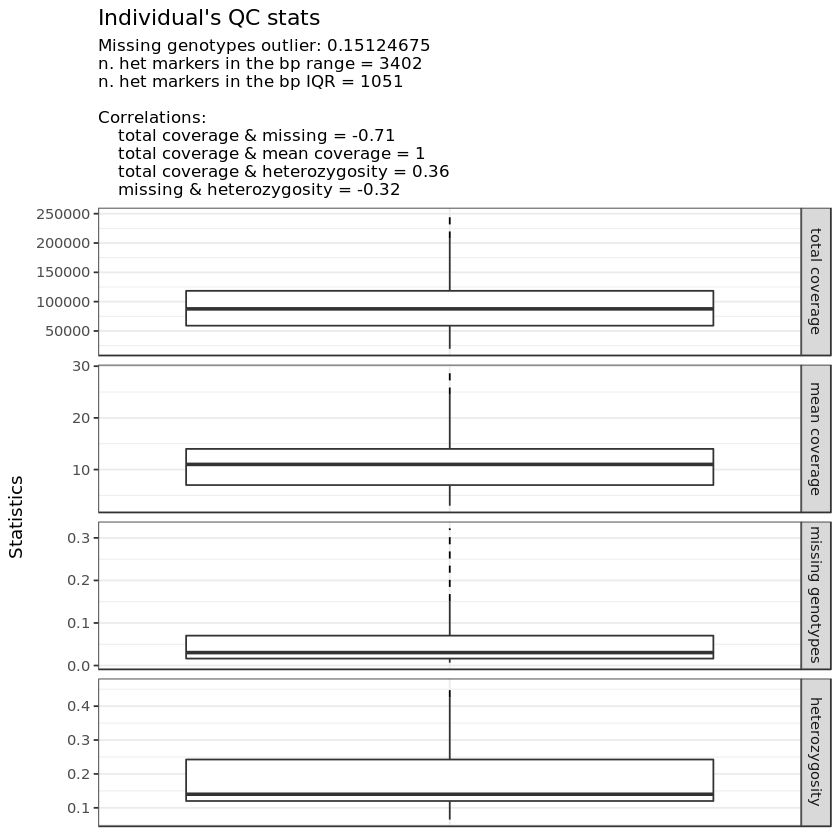

############################## completed read_vcf ##############################


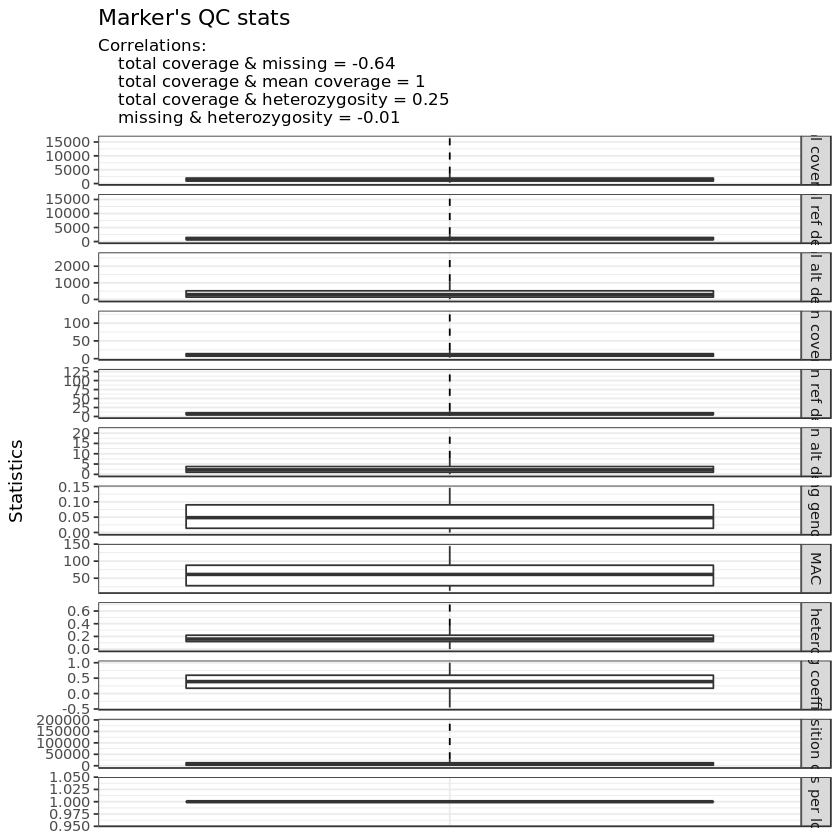

In [12]:
%expand
setwd("{suffix}")
data = read_vcf("m85-hwPbi-thinned.vcf", strata = "../../NFLDB.strata",
        vcf.stats = TRUE, parallel.core = 1, filter.common.markers = F,pop.levels=c("NB","DB","FL","ILMB"))


In [13]:
outs = genomic_converter(data, strata="../../NFLDB.strata", 
                  output = c("genind","structure"),
                 parallel.core = 4, filename = "allfiltu", pop.levels=c("NB","DB","FL","ILMB"))

################################################################################
########################## radiator::genomic_converter #########################
################################################################################


Execution date@time: 20191007@1100

Deprecated arguments identified inside "...": 
    pop.levels

Read documentation, for latest changes, and modify your codes!

Folder created: 03_radiator_genomic_converter_20191007@1100
Function call and arguments stored in: radiator_genomic_converter_args_20191007@1100.tsv
Filters parameters file generated: filters_parameters_20191007@1100.tsv

Importing data

Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144

Writing tidy data set:
allfiltu.rad

Preparing data for output

Data is bi-allelic
Calibrating REF/ALT alleles...
    number of REF/ALT switch = 4
Generating structure file
Generating adegenet genind object


################################### RESULTS ####################################


Data format of input: SeqVarGDSClass
Biallelic data
Number of markers: 8582
Number of chromosome/contig/scaffold: 1
Number of strata: 4
Number of individuals: 144

Computation time, overall: 53 sec


######################### genomic_converter completed ##########################


In [14]:
outs$genind

/// GENIND OBJECT /////////

 // 144 individuals; 8,582 loci; 17,164 alleles; size: 14.4 Mb

 // Basic content
   @tab:  144 x 17164 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 17164 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input, write = TRUE)

 // Optional content
   @pop: population of each individual (group size range: 29-44)
   @strata: a data frame with 2 columns ( INDIVIDUALS, POP_ID )

In [15]:
allfiltu = outs$genind
save(allfiltu, file="allfiltu.genind")

## Fixed within at least 2 pops

In [256]:
import pandas as pd
infile ="./maf05mac4het9m3R50_2/populations.sumstats.tsv"

IN = pd.read_table(infile,header=4)

In [257]:
fixed = IN[(IN['P'] >0.98) & (IN['Pop ID'] != "ILMB")]

In [262]:
fixed

,# Locus ID,Chr,BP,Col,Pop ID,P Nuc,Q Nuc,N,P,Obs Het,...,Exp Het,Exp Hom,Pi,Smoothed Pi,Smoothed Pi P-value,Fis,Smoothed Fis,Smoothed Fis P-value,HWE P-value,Private
5,178,18,2739,90,FL,A,-,29,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
9,179,18,2739,30,FL,T,-,28,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
12,183,18,10128,74,DB,A,-,29,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
14,183,18,10128,74,NB,A,-,40,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
16,185,18,10128,32,DB,T,-,29,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168773,474566,250036,11247,16,NB,G,-,39,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
168776,474567,250036,11186,48,FL,T,-,17,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
168777,474567,250036,11186,48,NB,T,-,24,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
168780,474581,250036,41435,48,FL,C,-,29,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [260]:
check = []
for row in fixed.itertuples(index=True):
    if (row._1,row.Chr,row.BP) not in check:
        check.append((row._1,row.Chr,row.BP))

x = IN[IN[["# Locus ID","Chr","BP"]].apply(tuple, 1).isin(check)]
x = x[(x['Pop ID'] == "DB") | (x['Pop ID'] == "NB")| (x['Pop ID'] == "FL")]   



In [309]:
x

,# Locus ID,Chr,BP,Col,Pop ID,P Nuc,Q Nuc,N,P,Obs Het,...,Exp Het,Exp Hom,Pi,Smoothed Pi,Smoothed Pi P-value,Fis,Smoothed Fis,Smoothed Fis P-value,HWE P-value,Private
4,178,18,2739,90,DB,A,G,29,0.948276,0.10345,...,0.09810,0.90190,0.09982,0.00044,0.0,-0.03636,-0.03636,0.0,1.0000,0
5,178,18,2739,90,FL,A,-,29,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.0000,0
6,178,18,2739,90,NB,A,G,38,0.039474,0.07895,...,0.07583,0.92417,0.07684,0.00030,0.0,-0.02740,-0.02740,0.0,1.0000,0
8,179,18,2739,30,DB,T,C,28,0.964286,0.07143,...,0.06888,0.93112,0.07013,0.00000,0.0,-0.01852,0.00000,0.0,1.0000,0
9,179,18,2739,30,FL,T,-,28,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168780,474581,250036,41435,48,FL,C,-,29,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.0000,0
168781,474581,250036,41435,48,NB,C,T,42,0.202381,0.30952,...,0.32285,0.67715,0.32674,0.00067,0.0,0.05268,0.05268,0.0,0.6583,0
168783,474584,250036,41435,31,DB,G,A,29,0.965517,0.06897,...,0.06659,0.93341,0.06776,0.00000,0.0,-0.01786,0.00000,0.0,1.0000,0
168784,474584,250036,41435,31,FL,G,-,29,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.0000,0


In [263]:
check =[]
goodLoc = []
for row in x.itertuples(index=True):
    if row.P < 0.02:
        if (row._1,row.Chr,row.BP) not in check:
            check.append((row._1,row.Chr,row.BP))
            if (row.Chr,row.BP) not in goodLoc:
                goodLoc.append((row.Chr,row.BP))

In [264]:
y = IN[IN[["Chr","BP"]].apply(tuple, 1).isin(goodLoc)]

In [265]:
y.iloc[0:20]

,# Locus ID,Chr,BP,Col,Pop ID,P Nuc,Q Nuc,N,P,Obs Het,...,Exp Het,Exp Hom,Pi,Smoothed Pi,Smoothed Pi P-value,Fis,Smoothed Fis,Smoothed Fis P-value,HWE P-value,Private
67,267,23,27403,15,ILMB,C,T,28,0.535714,0.50000,...,0.49745,0.50255,0.50649,0.00083,0.0,0.01282,0.01711,0.0,1.00000,0
68,267,23,27403,15,DB,C,-,21,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
69,267,23,27403,15,FL,-,T,13,0.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
70,267,23,27403,15,NB,C,-,23,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
71,267,23,27360,58,ILMB,A,G,25,0.520000,0.48000,...,0.49920,0.50080,0.50939,0.00083,0.0,0.05769,0.01711,0.0,1.00000,0
72,267,23,27360,58,DB,A,G,20,0.975000,0.05000,...,0.04875,0.95125,0.05000,0.00008,0.0,0.00000,0.00000,0.0,1.00000,0
73,267,23,27360,58,FL,-,G,13,0.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
74,267,23,27360,58,NB,A,-,22,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
75,298,28,22314,34,ILMB,G,A,43,0.662791,0.39535,...,0.44700,0.55300,0.45226,0.00947,0.0,0.12583,0.05979,0.0,0.49746,0
76,298,28,22314,34,DB,G,A,29,0.810345,0.31034,...,0.30737,0.69263,0.31276,0.00579,0.0,0.00774,-0.02774,0.0,1.00000,0


In [266]:
len(goodLoc)

5376

In [224]:
%expand
positions = []
OUT = open("{suffix}fixed2_98.positions","w")
OUTr = open("{suffix}fixed2_98.positions","w")
OUTr.write("LOCUS\tPOS\n")
n=0
for row in y.itertuples(index=True):
    if (row.Chr, row.BP) not in positions:
        positions.append((row.Chr, row.BP))
        OUT.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        OUTr.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        n+=1
OUT.close()
OUTr.close()
print(n)

5376


In [225]:
%expand
module load vcftools/v0.1.17

vcftools --vcf {suffix}m85-hwPbi.recode.vcf --recode \
--recode-INFO-all --positions {suffix}fixed2_98.positions \
--out {suffix}m85-hwPBi-fixed2_98


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ./maf05mac4het9m3R50_2/Making/m85-hwPbi.recode.vcf
	--recode-INFO-all
	--out ./maf05mac4het9m3R50_2/Making/m85-hwPBi-fixed2_98
	--positions ./maf05mac4het9m3R50_2/Making/fixed2_98.positions
	--recode

After filtering, kept 144 out of 144 Individuals
Outputting VCF file...
After filtering, kept 2435 out of a possible 15078 Sites
Run Time = 3.00 seconds


Execution date@time: 20191010@1141
Folder created: read_vcf_20191010@1141
Function call and arguments stored in: radiator_read_vcf_args_20191010@1141.tsv
File written: random.seed (716045)

Reading VCF
Data summary: 
    number of samples: 144
    number of markers: 2435
done! timing: 2 sec


File written: radiator_20191010@1141.gds

Analyzing the data...
VCF source: Stacks v2.4
Data is bi-allelic
Cleaning VCF's sample names
Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144
Reads assembly: de novo
Filters parameters file generated: filters_parameters_20191010@1141.tsv
Filters parameters file: initiated and updated


################################################################################
########################### radiator::filter_monomorphic #######################
################################################################################


Execution date@time: 20191010@1141
Function call and arguments stored in: radiator_filter_monomorphic_args_20191010@1141.tsv
Filters parameters file: initiated
File written: whitelist.polymorphic.markers_20191010@1141.tsv
Filters parameters file: updated


################################### RESULTS ####################################



Filter monomorphic markers
Number of individuals / strata / chrom / locus / SNP:
    Before: 144 / 4 / 1 / 1917 / 2435
    Blacklisted: 0 / 0 / 0 / 0 / 0
    After: 144 / 4 / 1 / 1917 / 2435

Computation time, overall: 0 sec


######################## filter_monomorphic completed ##########################



Preparing output files...
File written: whitelist.markers.tsv
Writing the filtered strata: strata.filtered.tsvstrata.filtered.tsv

Generating statistics after filtering
Generating individual stats...
File written: individuals qc info and stats summary
File written: individuals qc plot
Generating markers stats...


################################### SUMMARY ####################################




Summary (AFTER filtering):
Missing data: 
    markers: 0.05
    individuals: 0.05


Coverage info:
    individuals mean read depth: 25962
    individuals mean genotype coverage: 11
    markers mean coverage: 11


Number of chromosome/contig/scaffold: 1
Number of locus: 1917
Number of markers: 2435
Number of populations: 4
Number of individuals: 144

Number of ind/pop:
ILMB = 44
DB = 29
FL = 29
NB = 42

Number of duplicate id: 0
radiator Genomic Data Structure (GDS) file: radiator_20191010@1141.gds

Computation time, overall: 8 sec


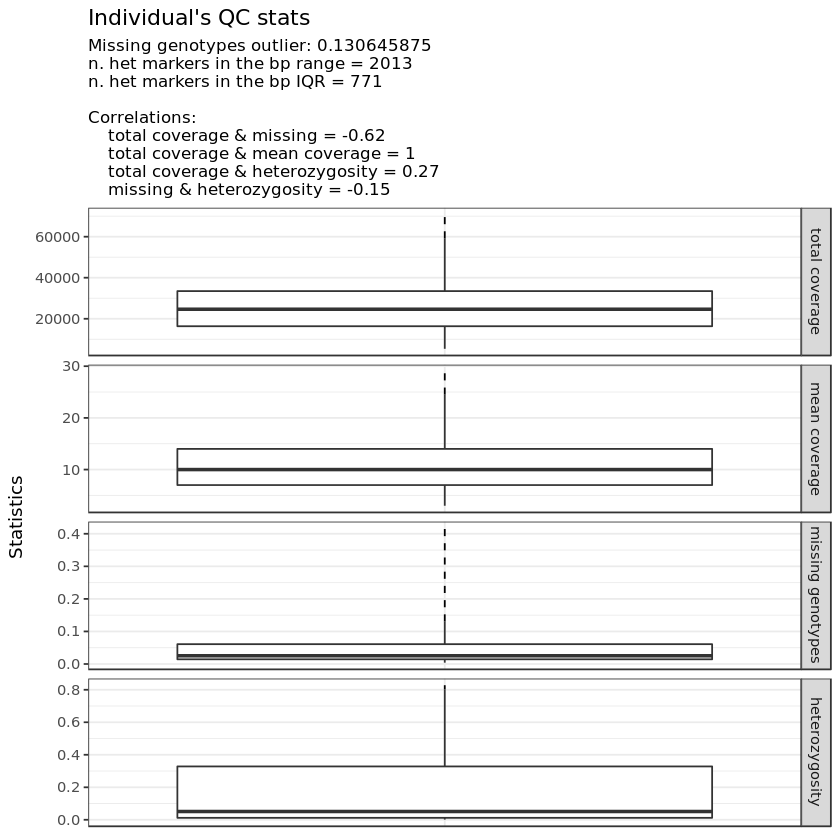

############################## completed read_vcf ##############################


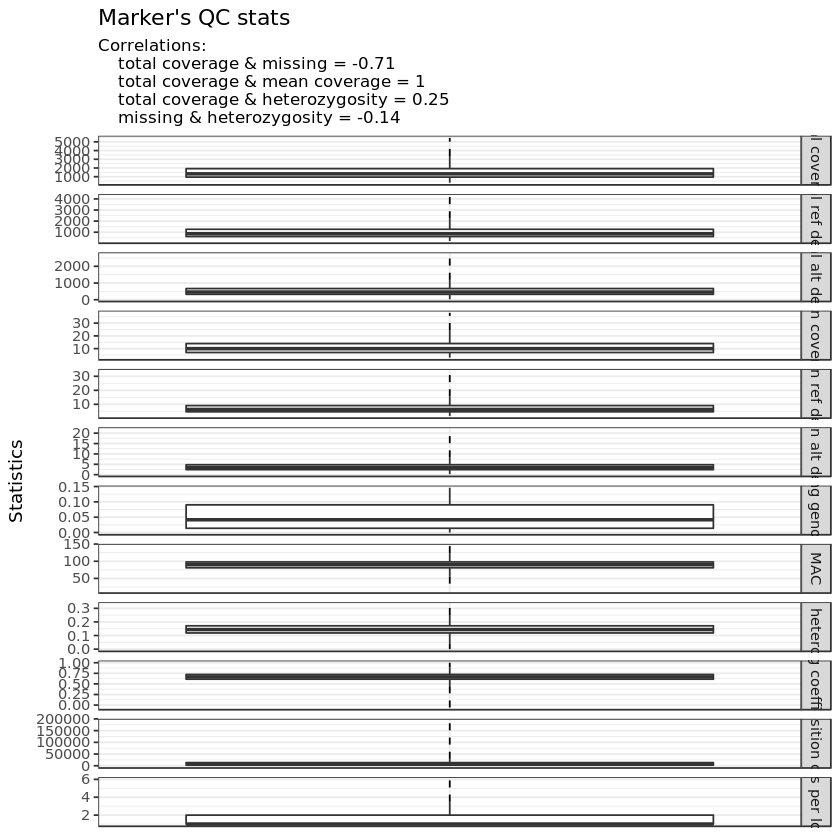

In [226]:
%expand
data = read_vcf("m85-hwPBi-fixed2_98.recode.vcf", strata = "../../NFLDB.strata",
        vcf.stats = TRUE, parallel.core = 4, filter.common.markers = F)


In [ ]:
#dataLD = filter_ld(data, interactive.filter = F, filter.short.ld = "mac",
#  filter.long.ld = 0.7, parallel.core = 4, long.ld.missing = TRUE,
#  filename = "filtered_hwld")

In [ ]:
genomic_converter(dataLD, strata="../../NFLDB.strata", 
                  output = c("genind","structure","vcf"),
                 parallel.core = 4, filename = "hwp3t1ld7")

In [227]:
%expand
module load tabix/0.2.6
module load samtools/1.6

bgzip {suffix}m85-hwPBi-fixed2_98.recode.vcf 
tabix -p vcf {suffix}m85-hwPBi-fixed2_98.recode.vcf.gz

In [228]:
%expand
module load bcftools/1.3.2

bcftools +prune {suffix}m85-hwPBi-fixed2_98.recode.vcf.gz -l 0.2 -n 1 -w 10000 \
-Ov -o {suffix}m85-hwPBi-fixed2_98-thinned.vcf
grep -v "#" {suffix}m85-hwPBi-fixed2_98-thinned.vcf | wc -l

1917


Execution date@time: 20191010@1146
Folder created: read_vcf_20191010@1146
Function call and arguments stored in: radiator_read_vcf_args_20191010@1146.tsv
File written: random.seed (955762)

Reading VCF
Data summary: 
    number of samples: 144
    number of markers: 1917
done! timing: 2 sec


File written: radiator_20191010@1146.gds

Analyzing the data...
VCF source: Stacks v2.4
Data is bi-allelic
Cleaning VCF's sample names
Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144
Reads assembly: de novo
Filters parameters file generated: filters_parameters_20191010@1146.tsv
Filters parameters file: initiated and updated


################################################################################
########################### radiator::filter_monomorphic #######################
################################################################################


Execution date@time: 20191010@1146
Function call and arguments stored in: radiator_filter_monomorphic_args_20191010@1146.tsv
Filters parameters file: initiated
File written: whitelist.polymorphic.markers_20191010@1146.tsv
Filters parameters file: updated


################################### RESULTS ####################################



Filter monomorphic markers
Number of individuals / strata / chrom / locus / SNP:
    Before: 144 / 4 / 1 / 1917 / 1917
    Blacklisted: 0 / 0 / 0 / 0 / 0
    After: 144 / 4 / 1 / 1917 / 1917

Computation time, overall: 0 sec


######################## filter_monomorphic completed ##########################



Preparing output files...
File written: whitelist.markers.tsv
Writing the filtered strata: strata.filtered.tsvstrata.filtered.tsv

Generating statistics after filtering
Generating individual stats...
File written: individuals qc info and stats summary
File written: individuals qc plot
Generating markers stats...


################################### SUMMARY ####################################




Summary (AFTER filtering):
Missing data: 
    markers: 0.05
    individuals: 0.05


Coverage info:
    individuals mean read depth: 20616
    individuals mean genotype coverage: 11
    markers mean coverage: 11


Number of chromosome/contig/scaffold: 1
Number of locus: 1917
Number of markers: 1917
Number of populations: 4
Number of individuals: 144

Number of ind/pop:
NB = 42
DB = 29
FL = 29
ILMB = 44

Number of duplicate id: 0
radiator Genomic Data Structure (GDS) file: radiator_20191010@1146.gds

Computation time, overall: 7 sec


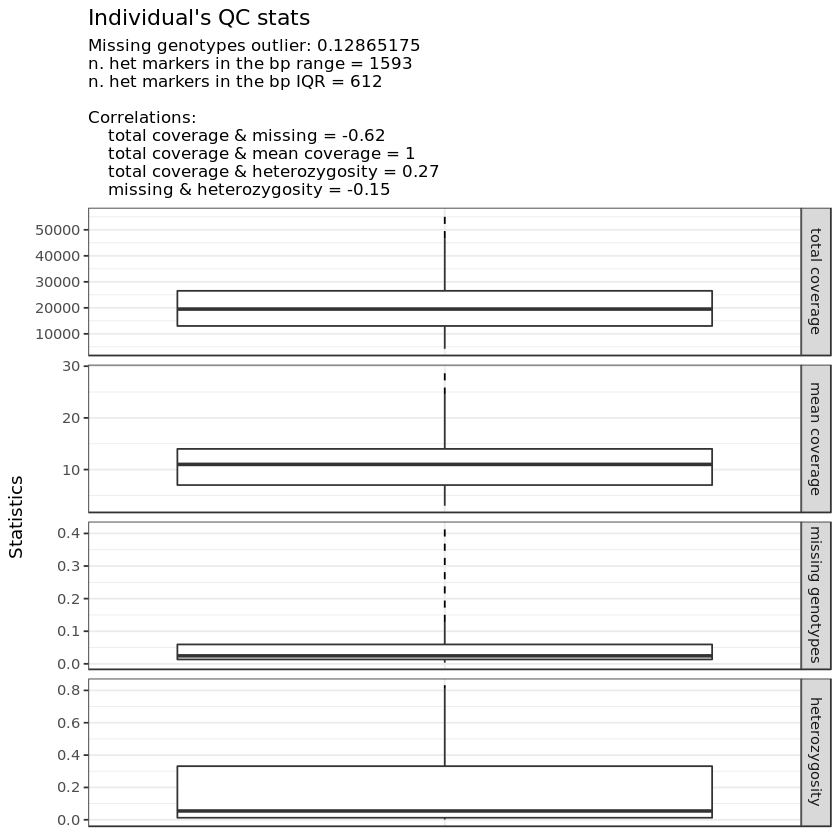

############################## completed read_vcf ##############################


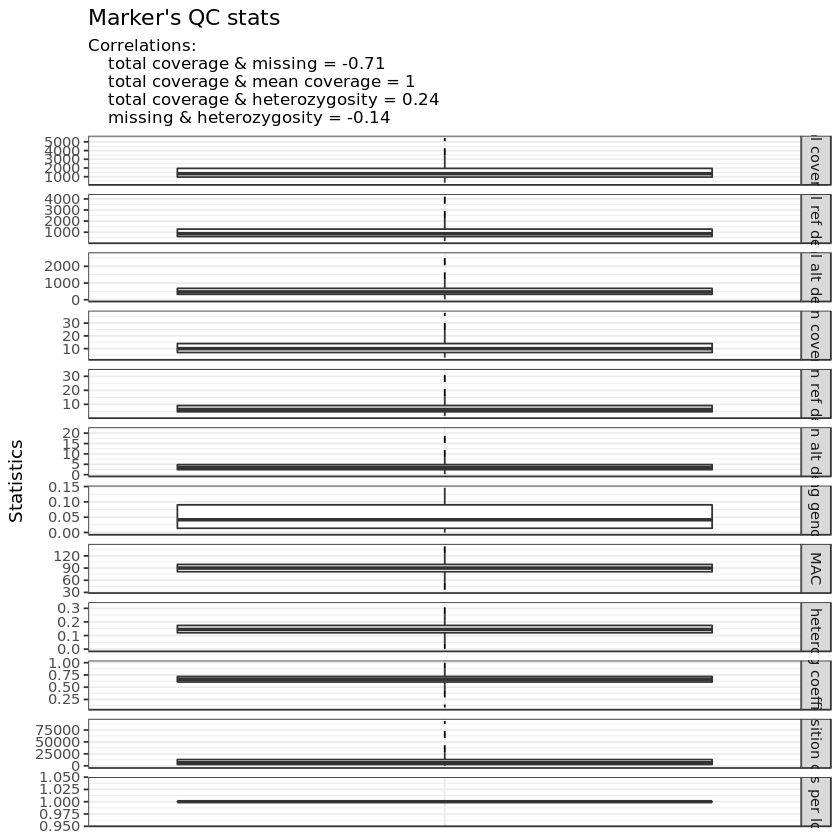

In [229]:
data = read_vcf("m85-hwPBi-fixed2_98-thinned.vcf", strata = "../../NFLDB.strata",
        vcf.stats = TRUE, parallel.core = 4, filter.common.markers = F,pop.levels=c("NB","DB","FL","ILMB"))


In [230]:
outs = genomic_converter(data, strata="../../NFLDB.strata", 
                  output = c("genind","structure"),
                 parallel.core = 4, filename = "fixed2_98u",pop.levels=c("NB","DB","FL","ILMB") )

################################################################################
########################## radiator::genomic_converter #########################
################################################################################


Execution date@time: 20191010@1147

Deprecated arguments identified inside "...": 
    pop.levels

Read documentation, for latest changes, and modify your codes!

Folder created: 11_radiator_genomic_converter_20191010@1147
Function call and arguments stored in: radiator_genomic_converter_args_20191010@1147.tsv
Filters parameters file generated: filters_parameters_20191010@1147.tsv

Importing data

Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144

Writing tidy data set:
fixed2_98u.rad

Preparing data for output

Data is bi-allelic
Calibrating REF/ALT alleles...
    number of REF/ALT switch = 1
Generating structure file
Generating adegenet genind object


################################### RESULTS ####################################


Data format of input: SeqVarGDSClass
Biallelic data
Number of markers: 1917
Number of chromosome/contig/scaffold: 1
Number of strata: 4
Number of individuals: 144

Computation time, overall: 9 sec


######################### genomic_converter completed ##########################


In [231]:
outs$genind

/// GENIND OBJECT /////////

 // 144 individuals; 1,917 loci; 3,834 alleles; size: 3.2 Mb

 // Basic content
   @tab:  144 x 3834 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 3834 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input, write = TRUE)

 // Optional content
   @pop: population of each individual (group size range: 29-44)
   @strata: a data frame with 2 columns ( INDIVIDUALS, POP_ID )

In [232]:
d = outs$genind
save(d, file="fixed2_98u.genind")

## Fixed within at least 2 pops (90)

In [293]:
import pandas as pd
infile ="./maf05mac4het9m3R50_2/populations.sumstats.tsv"

IN = pd.read_table(infile,header=4)

In [294]:
fixed = IN[(IN['P'] >0.9) & (IN['Pop ID'] != "ILMB")]

In [295]:
fixed

,# Locus ID,Chr,BP,Col,Pop ID,P Nuc,Q Nuc,N,P,Obs Het,...,Exp Het,Exp Hom,Pi,Smoothed Pi,Smoothed Pi P-value,Fis,Smoothed Fis,Smoothed Fis P-value,HWE P-value,Private
4,178,18,2739,90,DB,A,G,29,0.948276,0.10345,...,0.09810,0.90190,0.09982,0.00044,0.0,-0.03636,-0.03636,0.0,1.0,0
5,178,18,2739,90,FL,A,-,29,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.0,0
8,179,18,2739,30,DB,T,C,28,0.964286,0.07143,...,0.06888,0.93112,0.07013,0.00000,0.0,-0.01852,0.00000,0.0,1.0,0
9,179,18,2739,30,FL,T,-,28,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.0,0
12,183,18,10128,74,DB,A,-,29,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168777,474567,250036,11186,48,NB,T,-,24,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.0,0
168779,474581,250036,41435,48,DB,C,T,29,0.965517,0.06897,...,0.06659,0.93341,0.06776,0.00063,0.0,-0.01786,-0.26580,0.0,1.0,0
168780,474581,250036,41435,48,FL,C,-,29,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.0,0
168783,474584,250036,41435,31,DB,G,A,29,0.965517,0.06897,...,0.06659,0.93341,0.06776,0.00000,0.0,-0.01786,0.00000,0.0,1.0,0


In [296]:
check = []
for row in fixed.itertuples(index=True):
    if (row._1,row.Chr,row.BP) not in check:
        check.append((row._1,row.Chr,row.BP))

x = IN[IN[["# Locus ID","Chr","BP"]].apply(tuple, 1).isin(check)]
x = x[(x['Pop ID'] == "DB") | (x['Pop ID'] == "NB")| (x['Pop ID'] == "FL")]   



In [297]:
check =[]
goodLoc = []
for row in x.itertuples(index=True):
    if row.P < 0.1:
        if (row._1,row.Chr,row.BP) not in check:
            check.append((row._1,row.Chr,row.BP))
            if (row.Chr,row.BP) not in goodLoc:
                goodLoc.append((row.Chr,row.BP))

In [298]:
y = IN[IN[["Chr","BP"]].apply(tuple, 1).isin(goodLoc)]

In [299]:
y.iloc[0:20]

,# Locus ID,Chr,BP,Col,Pop ID,P Nuc,Q Nuc,N,P,Obs Het,...,Exp Het,Exp Hom,Pi,Smoothed Pi,Smoothed Pi P-value,Fis,Smoothed Fis,Smoothed Fis P-value,HWE P-value,Private
3,178,18,2739,90,ILMB,A,G,42,0.845238,0.30952,...,0.26162,0.73838,0.26477,0.00223,0.0,-0.16901,-0.07313,0.0,0.56574,0
4,178,18,2739,90,DB,A,G,29,0.948276,0.10345,...,0.09810,0.90190,0.09982,0.00044,0.0,-0.03636,-0.03636,0.0,1.00000,0
5,178,18,2739,90,FL,A,-,29,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
6,178,18,2739,90,NB,A,G,38,0.039474,0.07895,...,0.07583,0.92417,0.07684,0.00030,0.0,-0.02740,-0.02740,0.0,1.00000,0
7,179,18,2739,30,ILMB,T,C,44,0.818182,0.31818,...,0.29752,0.70248,0.30094,0.00000,0.0,-0.05729,0.00000,0.0,1.00000,0
8,179,18,2739,30,DB,T,C,28,0.964286,0.07143,...,0.06888,0.93112,0.07013,0.00000,0.0,-0.01852,0.00000,0.0,1.00000,0
9,179,18,2739,30,FL,T,-,28,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
10,179,18,2739,30,NB,T,C,40,0.050000,0.05000,...,0.09500,0.90500,0.09620,0.00000,0.0,0.48026,0.00000,0.0,0.07546,0
67,267,23,27403,15,ILMB,C,T,28,0.535714,0.50000,...,0.49745,0.50255,0.50649,0.00083,0.0,0.01282,0.01711,0.0,1.00000,0
68,267,23,27403,15,DB,C,-,21,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0


In [300]:
len(goodLoc)

8175

In [301]:
%expand
positions = []
OUT = open("{suffix}fixed2_90.positions","w")
OUTr = open("{suffix}fixed2_90R.positions","w")
OUTr.write("LOCUS\tPOS\n")
n=0
for row in y.itertuples(index=True):
    if (row.Chr, row.BP) not in positions:
        positions.append((row.Chr, row.BP))
        OUT.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        OUTr.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        n+=1
OUT.close()
OUTr.close()
print(n)

8175


In [302]:
%expand
module load vcftools/v0.1.17

vcftools --vcf {suffix}m85-hwPbi.recode.vcf --recode \
--recode-INFO-all --positions {suffix}fixed2_90.positions \
--out {suffix}m85-hwPBi-fixed2_90


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ./maf05mac4het9m3R50_2/Making/m85-hwPbi.recode.vcf
	--recode-INFO-all
	--out ./maf05mac4het9m3R50_2/Making/m85-hwPBi-fixed2_90
	--positions ./maf05mac4het9m3R50_2/Making/fixed2_90.positions
	--recode

After filtering, kept 144 out of 144 Individuals
Outputting VCF file...
After filtering, kept 3752 out of a possible 15078 Sites
Run Time = 4.00 seconds


Execution date@time: 20191010@1141
Folder created: read_vcf_20191010@1141
Function call and arguments stored in: radiator_read_vcf_args_20191010@1141.tsv
File written: random.seed (716045)

Reading VCF
Data summary: 
    number of samples: 144
    number of markers: 2435
done! timing: 2 sec


File written: radiator_20191010@1141.gds

Analyzing the data...
VCF source: Stacks v2.4
Data is bi-allelic
Cleaning VCF's sample names
Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144
Reads assembly: de novo
Filters parameters file generated: filters_parameters_20191010@1141.tsv
Filters parameters file: initiated and updated


################################################################################
########################### radiator::filter_monomorphic #######################
################################################################################


Execution date@time: 20191010@1141
Function call and arguments stored in: radiator_filter_monomorphic_args_20191010@1141.tsv
Filters parameters file: initiated
File written: whitelist.polymorphic.markers_20191010@1141.tsv
Filters parameters file: updated


################################### RESULTS ####################################



Filter monomorphic markers
Number of individuals / strata / chrom / locus / SNP:
    Before: 144 / 4 / 1 / 1917 / 2435
    Blacklisted: 0 / 0 / 0 / 0 / 0
    After: 144 / 4 / 1 / 1917 / 2435

Computation time, overall: 0 sec


######################## filter_monomorphic completed ##########################



Preparing output files...
File written: whitelist.markers.tsv
Writing the filtered strata: strata.filtered.tsvstrata.filtered.tsv

Generating statistics after filtering
Generating individual stats...
File written: individuals qc info and stats summary
File written: individuals qc plot
Generating markers stats...


################################### SUMMARY ####################################




Summary (AFTER filtering):
Missing data: 
    markers: 0.05
    individuals: 0.05


Coverage info:
    individuals mean read depth: 25962
    individuals mean genotype coverage: 11
    markers mean coverage: 11


Number of chromosome/contig/scaffold: 1
Number of locus: 1917
Number of markers: 2435
Number of populations: 4
Number of individuals: 144

Number of ind/pop:
ILMB = 44
DB = 29
FL = 29
NB = 42

Number of duplicate id: 0
radiator Genomic Data Structure (GDS) file: radiator_20191010@1141.gds

Computation time, overall: 8 sec


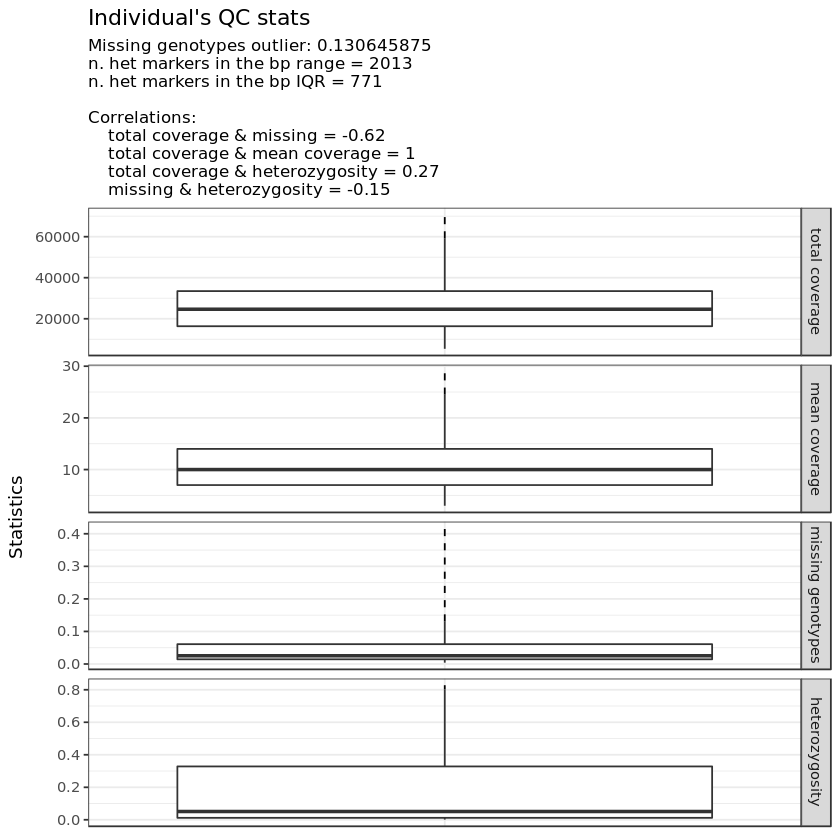

############################## completed read_vcf ##############################


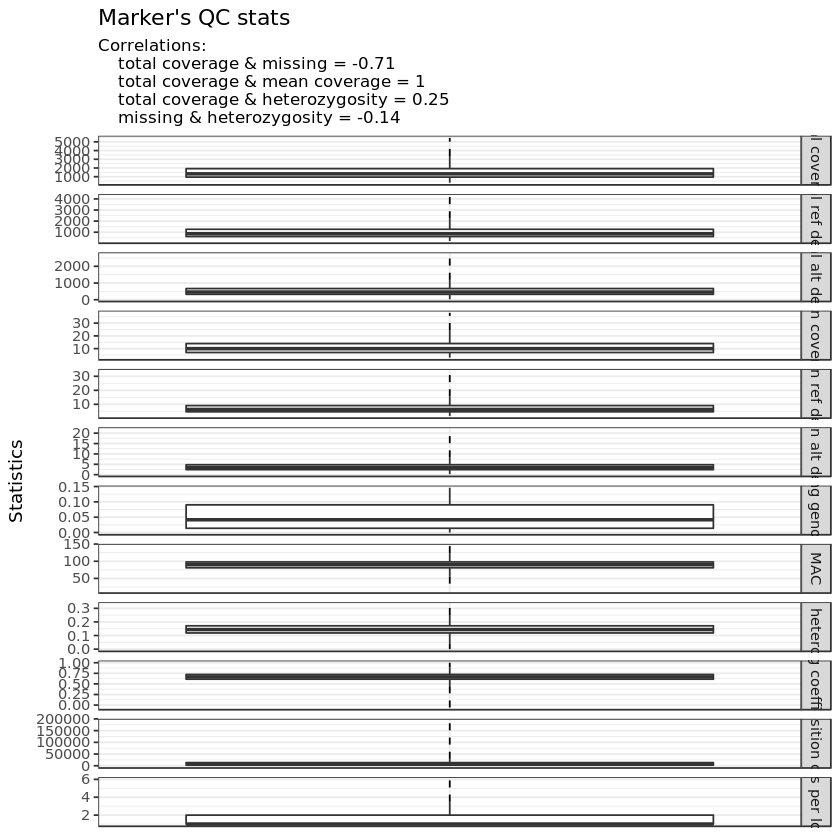

In [226]:
%expand
data = read_vcf("m85-hwPBi-fixed2_98.recode.vcf", strata = "../../NFLDB.strata",
        vcf.stats = TRUE, parallel.core = 4, filter.common.markers = F)


In [ ]:
#dataLD = filter_ld(data, interactive.filter = F, filter.short.ld = "mac",
#  filter.long.ld = 0.7, parallel.core = 4, long.ld.missing = TRUE,
#  filename = "filtered_hwld")

In [ ]:
genomic_converter(dataLD, strata="../../NFLDB.strata", 
                  output = c("genind","structure","vcf"),
                 parallel.core = 4, filename = "hwp3t1ld7")

In [303]:
%expand
module load tabix/0.2.6
module load samtools/1.6

bgzip {suffix}m85-hwPBi-fixed2_90.recode.vcf 
tabix -p vcf {suffix}m85-hwPBi-fixed2_90.recode.vcf.gz

In [304]:
%expand
module load bcftools/1.3.2

bcftools +prune {suffix}m85-hwPBi-fixed2_90.recode.vcf.gz -l 0.2 -n 1 -w 10000 \
-Ov -o {suffix}m85-hwPBi-fixed2_90-thinned.vcf
grep -v "#" {suffix}m85-hwPBi-fixed2_90-thinned.vcf | wc -l

2809


Execution date@time: 20191010@1654
Folder created: read_vcf_20191010@1654
Function call and arguments stored in: radiator_read_vcf_args_20191010@1654.tsv
File written: random.seed (605520)

Reading VCF
Data summary: 
    number of samples: 144
    number of markers: 2809
done! timing: 5 sec


File written: radiator_20191010@1654.gds

Analyzing the data...
VCF source: Stacks v2.4
Data is bi-allelic
Cleaning VCF's sample names
Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144
Reads assembly: de novo
Filters parameters file generated: filters_parameters_20191010@1654.tsv
Filters parameters file: initiated and updated


################################################################################
########################### radiator::filter_monomorphic #######################
################################################################################


Execution date@time: 20191010@1654
Function call and arguments stored in: radiator_filter_monomorphic_args_20191010@1654.tsv
Filters parameters file: initiated
File written: whitelist.polymorphic.markers_20191010@1654.tsv
Filters parameters file: updated


################################### RESULTS ####################################



Filter monomorphic markers
Number of individuals / strata / chrom / locus / SNP:
    Before: 144 / 4 / 1 / 2809 / 2809
    Blacklisted: 0 / 0 / 0 / 0 / 0
    After: 144 / 4 / 1 / 2809 / 2809

Computation time, overall: 0 sec


######################## filter_monomorphic completed ##########################



Preparing output files...
File written: whitelist.markers.tsv
Writing the filtered strata: strata.filtered.tsvstrata.filtered.tsv

Generating statistics after filtering
Generating individual stats...
File written: individuals qc info and stats summary
File written: individuals qc plot
Generating markers stats...


################################### SUMMARY ####################################




Summary (AFTER filtering):
Missing data: 
    markers: 0.05
    individuals: 0.05


Coverage info:
    individuals mean read depth: 30566
    individuals mean genotype coverage: 11
    markers mean coverage: 11


Number of chromosome/contig/scaffold: 1
Number of locus: 2809
Number of markers: 2809
Number of populations: 4
Number of individuals: 144

Number of ind/pop:
NB = 42
DB = 29
FL = 29
ILMB = 44

Number of duplicate id: 0
radiator Genomic Data Structure (GDS) file: radiator_20191010@1654.gds

Computation time, overall: 11 sec


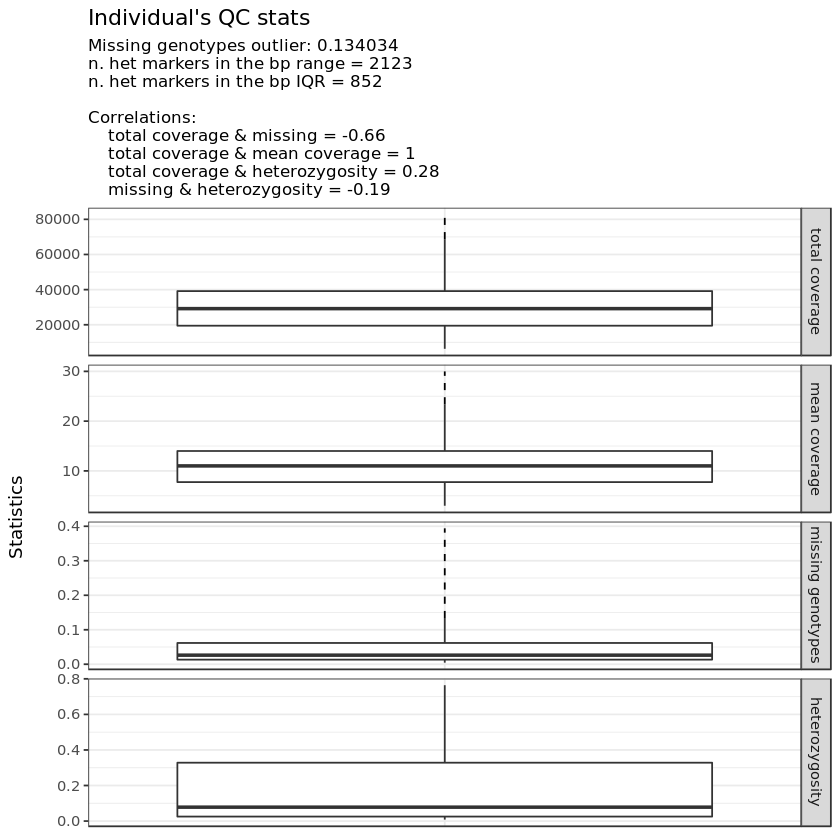

############################## completed read_vcf ##############################


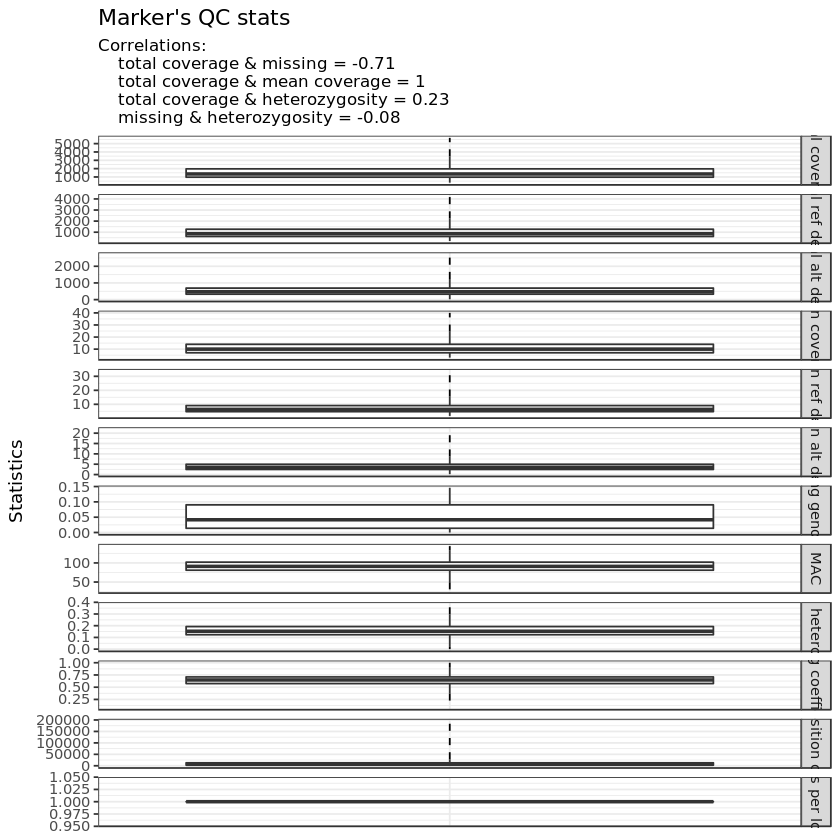

In [305]:
data = read_vcf("m85-hwPBi-fixed2_90-thinned.vcf", strata = "../../NFLDB.strata",
        vcf.stats = TRUE, parallel.core = 4, filter.common.markers = F,pop.levels=c("NB","DB","FL","ILMB"))


In [306]:
outs = genomic_converter(data, strata="../../NFLDB.strata", 
                  output = c("genind","structure"),
                 parallel.core = 4, filename = "fixed2_90u",pop.levels=c("NB","DB","FL","ILMB") )

################################################################################
########################## radiator::genomic_converter #########################
################################################################################


Execution date@time: 20191010@1654

Deprecated arguments identified inside "...": 
    pop.levels

Read documentation, for latest changes, and modify your codes!

Folder created: 15_radiator_genomic_converter_20191010@1654
Function call and arguments stored in: radiator_genomic_converter_args_20191010@1654.tsv
Filters parameters file generated: filters_parameters_20191010@1654.tsv

Importing data

Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144

Writing tidy data set:
fixed2_90u.rad

Preparing data for output

Data is bi-allelic
Calibrating REF/ALT alleles...
    number of REF/ALT switch = 3
Generating structure file
Generating adegenet genind object


################################### RESULTS ####################################


Data format of input: SeqVarGDSClass
Biallelic data
Number of markers: 2809
Number of chromosome/contig/scaffold: 1
Number of strata: 4
Number of individuals: 144

Computation time, overall: 11 sec


######################### genomic_converter completed ##########################


In [307]:
outs$genind

/// GENIND OBJECT /////////

 // 144 individuals; 2,809 loci; 5,618 alleles; size: 4.7 Mb

 // Basic content
   @tab:  144 x 5618 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 5618 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input, write = TRUE)

 // Optional content
   @pop: population of each individual (group size range: 29-44)
   @strata: a data frame with 2 columns ( INDIVIDUALS, POP_ID )

In [308]:
d = outs$genind
save(d, file="fixed2_90u.genind")

### Top markers based on PCA (fixed2_90

In [3]:
%expand
module load vcftools/v0.1.17

vcftools --vcf {suffix}m85-hwPBi-fixed2_90-thinned.vcf --recode \
--recode-INFO-all --positions {suffix}../Analysis/fixed2_90_pc12_90.positions \
--out {suffix}../Analysis/pc12_90-fixed2_90


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ./maf05mac4het9m3R50_2/Making/m85-hwPBi-fixed2_90-thinned.vcf
	--recode-INFO-all
	--out ./maf05mac4het9m3R50_2/Making/../Analysis/pc12_90-fixed2_90
	--positions ./maf05mac4het9m3R50_2/Making/../Analysis/fixed2_90_pc12_90.positions
	--recode

After filtering, kept 144 out of 144 Individuals
Outputting VCF file...
After filtering, kept 549 out of a possible 2809 Sites
Run Time = 1.00 seconds


In [6]:
getwd()

[1] "/gpfs01/home/kes0132/Delta/Stacks_Assembly/MyStacks/maf05mac4het9m3R50_2/Making"

Execution date@time: 20191014@1244
Folder created: read_vcf_20191014@1244
Function call and arguments stored in: radiator_read_vcf_args_20191014@1244.tsv
File written: random.seed (264889)

Reading VCF
Data summary: 
    number of samples: 144
    number of markers: 549
done! timing: 9 sec


File written: radiator_20191014@1244.gds

Analyzing the data...
VCF source: Stacks v2.4
Data is bi-allelic
Cleaning VCF's sample names
Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144
Reads assembly: de novo
Filters parameters file generated: filters_parameters_20191014@1244.tsv
Filters parameters file: initiated and updated


################################################################################
########################### radiator::filter_monomorphic #######################
################################################################################


Execution date@time: 20191014@1244
Function call and arguments stored in: radiator_filter_monomorphic_args_20191014@1244.tsv
Filters parameters file: initiated
File written: whitelist.polymorphic.markers_20191014@1244.tsv
Filters parameters file: updated


################################### RESULTS ####################################



Filter monomorphic markers
Number of individuals / strata / chrom / locus / SNP:
    Before: 144 / 4 / 1 / 549 / 549
    Blacklisted: 0 / 0 / 0 / 0 / 0
    After: 144 / 4 / 1 / 549 / 549

Computation time, overall: 0 sec


######################## filter_monomorphic completed ##########################



Preparing output files...
File written: whitelist.markers.tsv
Writing the filtered strata: strata.filtered.tsvstrata.filtered.tsv

Generating statistics after filtering
Generating individual stats...
File written: individuals qc info and stats summary
File written: individuals qc plot
Generating markers stats...


################################### SUMMARY ####################################




Summary (AFTER filtering):
Missing data: 
    markers: 0.02
    individuals: 0.02


Coverage info:
    individuals mean read depth: 8132
    individuals mean genotype coverage: 15
    markers mean coverage: 15


Number of chromosome/contig/scaffold: 1
Number of locus: 549
Number of markers: 549
Number of populations: 4
Number of individuals: 144

Number of ind/pop:
NB = 42
DB = 29
FL = 29
ILMB = 44

Number of duplicate id: 0
radiator Genomic Data Structure (GDS) file: radiator_20191014@1244.gds

Computation time, overall: 32 sec


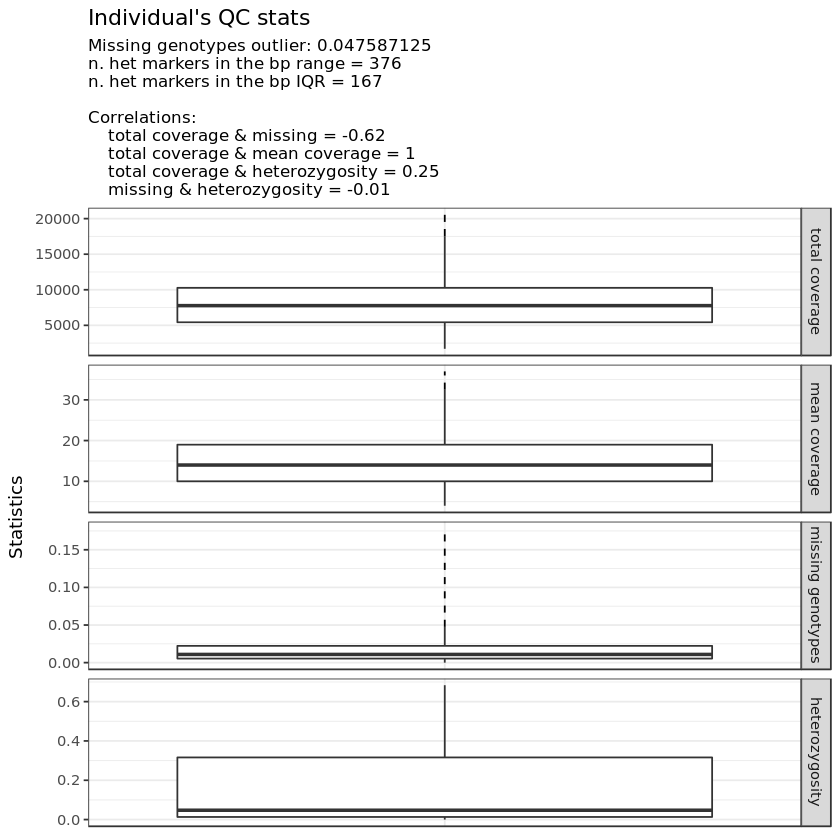

############################## completed read_vcf ##############################


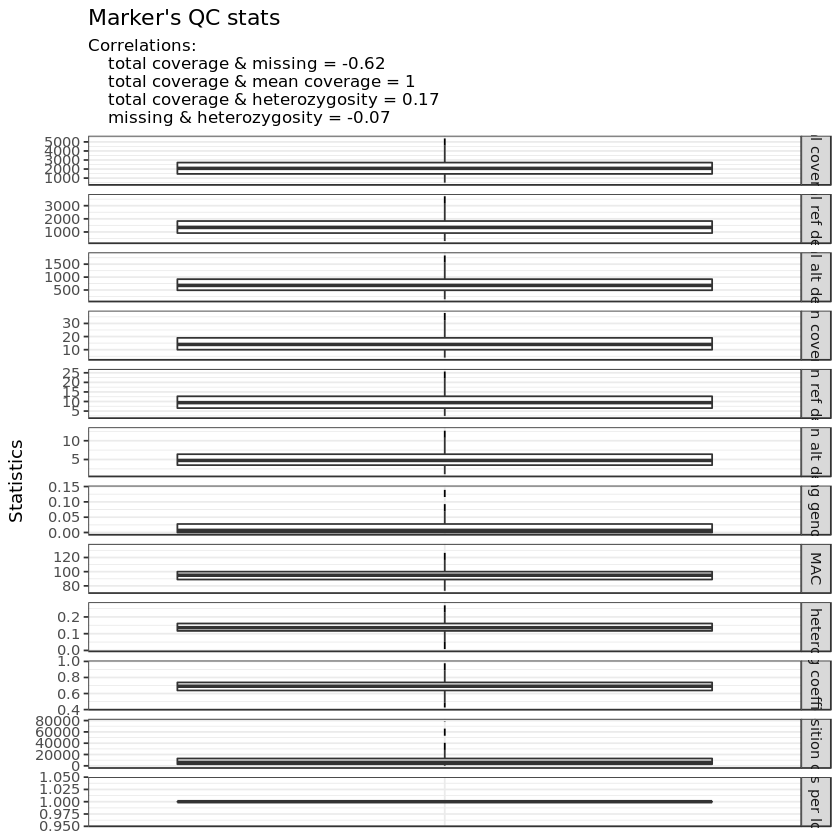

In [7]:
%expand

data = read_vcf("../Analysis/pc12_90-fixed2_90.recode.vcf", strata = "../../NFLDB.strata",
        vcf.stats = TRUE, parallel.core = 4, filter.common.markers = F, pop.levels=c("NB","DB","FL","ILMB") )


In [8]:
outs = genomic_converter(data, strata="../../NFLDB.strata", 
                  output = c("genind","structure"),
                 parallel.core = 4, filename = "pc12_90-fixed2_90",pop.levels=c("NB","DB","FL","ILMB"))

################################################################################
########################## radiator::genomic_converter #########################
################################################################################


Execution date@time: 20191014@1244

Deprecated arguments identified inside "...": 
    pop.levels

Read documentation, for latest changes, and modify your codes!

Folder created: 19_radiator_genomic_converter_20191014@1244
Function call and arguments stored in: radiator_genomic_converter_args_20191014@1244.tsv
Filters parameters file generated: filters_parameters_20191014@1244.tsv

Importing data

Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144

Writing tidy data set:
pc12_90-fixed2_90.rad

Preparing data for output

Data is bi-allelic
Calibrating REF/ALT alleles...
    number of REF/ALT switch = 0
Generating structure file
Generating adegenet genind object


################################### RESULTS ####################################


Data format of input: SeqVarGDSClass
Biallelic data
Number of markers: 549
Number of chromosome/contig/scaffold: 1
Number of strata: 4
Number of individuals: 144

Computation time, overall: 4 sec


######################### genomic_converter completed ##########################


In [9]:
outs$genind

/// GENIND OBJECT /////////

 // 144 individuals; 549 loci; 1,098 alleles; size: 977.9 Kb

 // Basic content
   @tab:  144 x 1098 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 1098 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input, write = TRUE)

 // Optional content
   @pop: population of each individual (group size range: 29-44)
   @strata: a data frame with 2 columns ( INDIVIDUALS, POP_ID )

In [10]:
d = outs$genind
save(d, file="../Analysis/pc12_90-fixed2_90.genind")

### Top markers based on PCA w/intergrades (fixed2_90)

In [1]:
%expand
module load vcftools/v0.1.17

vcftools --vcf {suffix}m85-hwPBi-fixed2_90-thinned.vcf --recode \
--recode-INFO-all --positions {suffix}../Analysis/fixed2_90_pc12_90_int.positions \
--out {suffix}../Analysis/pc12_90-fixed2_90-int

Use of %expand magic in SoS cells is deprecated.
Failed to interpolate module load vcftools/v0.1.17

vcftools --vcf {suffix}m85-hwPBi-fixed2_90-thinned.vcf --recode \
--recode-INFO-all --positions {suffix}../Analysis/fixed2_90_pc12_90_int.positions \
--out {suffix}../Analysis/pc12_90-fixed2_90-int: name 'suffix' is not defined


In [6]:
getwd()

[1] "/gpfs01/home/kes0132/Delta/Stacks_Assembly/MyStacks"

Execution date@time: 20191018@1404
Folder created: read_vcf_20191018@1404
Function call and arguments stored in: radiator_read_vcf_args_20191018@1404.tsv
File written: random.seed (763480)

Reading VCF
Data summary: 
    number of samples: 144
    number of markers: 562
done! timing: 8 sec


File written: radiator_20191018@1404.gds

Analyzing the data...
VCF source: Stacks v2.4
Data is bi-allelic
Cleaning VCF's sample names
Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144
Reads assembly: reference-assisted
Filters parameters file generated: filters_parameters_20191018@1404.tsv
Filters parameters file: initiated and updated


################################################################################
########################### radiator::filter_monomorphic #######################
################################################################################


Execution date@time: 20191018@1404
Function call and arguments stored in: radiator_filter_monomorphic_args_20191018@1404.tsv
Filters parameters file: initiated
File written: whitelist.polymorphic.markers_20191018@1404.tsv
Filters parameters file: updated


################################### RESULTS ####################################



Filter monomorphic markers
Number of individuals / strata / chrom / locus / SNP:
    Before: 144 / 4 / 562 / 562 / 562
    Blacklisted: 0 / 0 / 0 / 0 / 0
    After: 144 / 4 / 562 / 562 / 562

Computation time, overall: 0 sec


######################## filter_monomorphic completed ##########################



Preparing output files...
File written: whitelist.markers.tsv
Writing the filtered strata: strata.filtered.tsvstrata.filtered.tsv

Generating statistics after filtering
Generating individual stats...
File written: individuals qc info and stats summary
File written: individuals qc plot
Generating markers stats...


################################### SUMMARY ####################################




Summary (AFTER filtering):
Missing data: 
    markers: 0.02
    individuals: 0.02


Coverage info:
    individuals mean read depth: 7949
    individuals mean genotype coverage: 14
    markers mean coverage: 14


Number of chromosome/contig/scaffold: 562
Number of locus: 562
Number of markers: 562
Number of populations: 4
Number of individuals: 144

Number of ind/pop:
NB = 42
DB = 29
FL = 29
ILMB = 44

Number of duplicate id: 0
radiator Genomic Data Structure (GDS) file: radiator_20191018@1404.gds

Computation time, overall: 27 sec


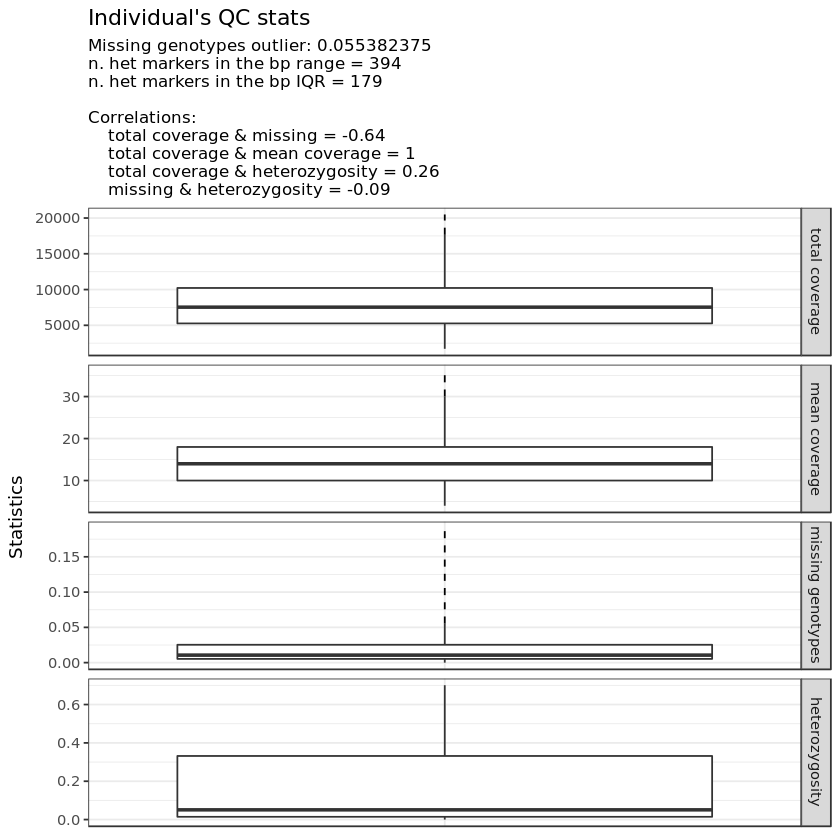

############################## completed read_vcf ##############################


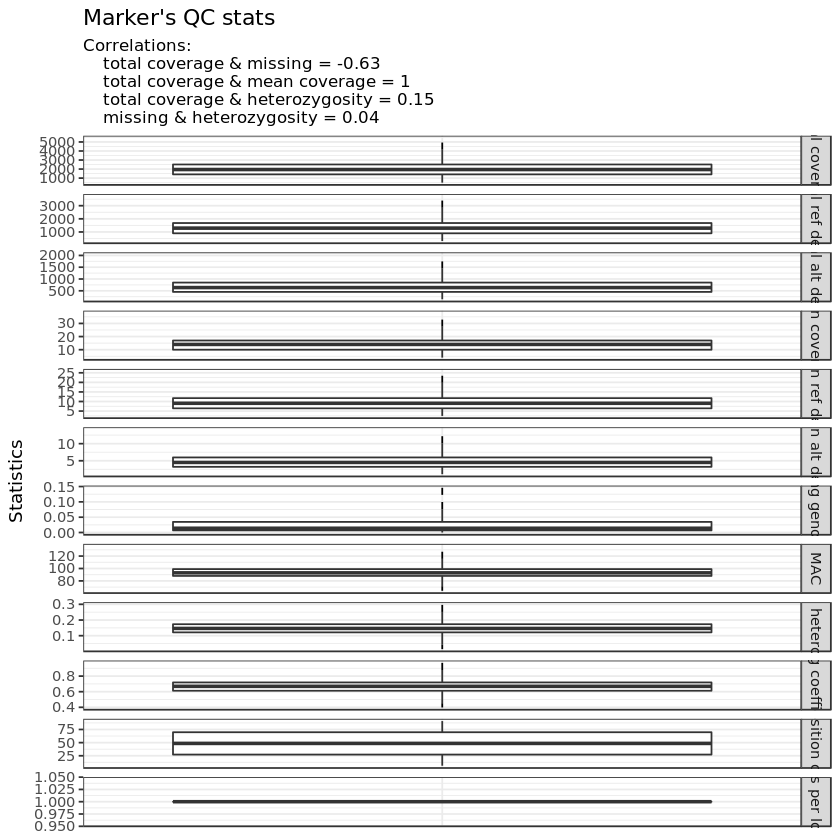

In [10]:
%expand
#setwd("{suffix}")
data = read_vcf("../Analysis/pc12_90-fixed2_90-int.recode.vcf", strata = "../../NFLDB.strata",
        vcf.stats = TRUE, parallel.core = 4, filter.common.markers = F, pop.levels=c("NB","DB","FL","ILMB"),  )


In [11]:
outs = genomic_converter(data, strata="../../NFLDB.strata", 
                  output = c("genind","structure"),
                 parallel.core = 4, filename = "pc12_90-fixed2_90-int",pop.levels=c("NB","DB","FL","ILMB"))

################################################################################
########################## radiator::genomic_converter #########################
################################################################################


Execution date@time: 20191018@1405

Deprecated arguments identified inside "...": 
    pop.levels

Read documentation, for latest changes, and modify your codes!

Folder created: 21_radiator_genomic_converter_20191018@1405
Function call and arguments stored in: radiator_genomic_converter_args_20191018@1405.tsv
Filters parameters file generated: filters_parameters_20191018@1405.tsv

Importing data

Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144

Writing tidy data set:
pc12_90-fixed2_90-int.rad

Preparing data for output

Data is bi-allelic
Calibrating REF/ALT alleles...
    number of REF/ALT switch = 0
Generating structure file
Generating adegenet genind object


################################### RESULTS ####################################


Data format of input: SeqVarGDSClass
Biallelic data
Number of markers: 562
Number of chromosome/contig/scaffold: 562
Number of strata: 4
Number of individuals: 144

Computation time, overall: 16 sec


######################### genomic_converter completed ##########################


In [12]:
outs$genind

/// GENIND OBJECT /////////

 // 144 individuals; 562 loci; 1,124 alleles; size: 1017.6 Kb

 // Basic content
   @tab:  144 x 1124 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 1124 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input, write = TRUE)

 // Optional content
   @pop: population of each individual (group size range: 29-44)
   @strata: a data frame with 2 columns ( INDIVIDUALS, POP_ID )

In [13]:
d = outs$genind
save(d, file="../Analysis/pc12_90-fixed2_90-int.genind")

## Fixed within individual pops

In [233]:
import pandas as pd
infile ="./maf05mac4het9m3R50_2/populations.sumstats.tsv"

IN = pd.read_table(infile,header=4)

In [141]:
IN.dtypes

# Locus ID                int64
Chr                       int64
BP                        int64
Col                       int64
Pop ID                   object
P Nuc                    object
Q Nuc                    object
N                         int64
P                       float64
Obs Het                 float64
Obs Hom                 float64
Exp Het                 float64
Exp Hom                 float64
Pi                      float64
Smoothed Pi             float64
Smoothed Pi P-value     float64
Fis                     float64
Smoothed Fis            float64
Smoothed Fis P-value    float64
HWE P-value             float64
Private                   int64
dtype: object

### fixed between DB and NB

In [234]:
# fixed between DB and NB
fixed = IN[(IN['P'] >0.98) & ((IN['Pop ID'] == "NB") | (IN['Pop ID'] == "DB"))]

In [235]:
check = []
for row in fixed.itertuples(index=True):
    if (row._1,row.Chr,row.BP) not in check:
        check.append((row._1,row.Chr,row.BP))

x = IN[IN[["# Locus ID","Chr","BP"]].apply(tuple, 1).isin(check)]
x = x[(x['Pop ID'] == "DB") | (x['Pop ID'] == "NB")]   



In [236]:
check =[]
goodLoc = []
for row in x.itertuples(index=True):
    if row.P < 0.02:
        if (row._1,row.Chr,row.BP) not in check:
            check.append((row._1,row.Chr,row.BP))
            if (row.Chr,row.BP) not in goodLoc:
                goodLoc.append((row.Chr,row.BP))

In [237]:
y = IN[IN[["Chr","BP"]].apply(tuple, 1).isin(goodLoc)]

In [238]:
y.iloc[0:15]

,# Locus ID,Chr,BP,Col,Pop ID,P Nuc,Q Nuc,N,P,Obs Het,...,Exp Het,Exp Hom,Pi,Smoothed Pi,Smoothed Pi P-value,Fis,Smoothed Fis,Smoothed Fis P-value,HWE P-value,Private
139,436,38,5204,61,ILMB,G,C,43,0.848837,0.20930,...,0.25663,0.74337,0.25964,0.00139,0.0,0.19389,0.19389,0.0,0.22263,0
140,436,38,5204,61,DB,G,-,26,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
141,436,38,5204,61,FL,G,-,27,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
142,436,38,5204,61,NB,G,C,30,0.016667,0.03333,...,0.03278,0.96722,0.03333,0.00013,0.0,-0.00000,-0.00000,0.0,1.00000,0
2516,8235,2000,3888,26,ILMB,G,C,44,0.761364,0.34091,...,0.36338,0.63662,0.36755,0.00257,0.0,0.07249,0.07249,0.0,0.68278,0
2517,8235,2000,3888,26,DB,G,C,28,0.982143,0.03571,...,0.03508,0.96492,0.03571,0.00024,0.0,-0.00000,-0.00000,0.0,1.00000,0
2518,8235,2000,3888,26,FL,G,-,29,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
2519,8235,2000,3888,26,NB,-,C,40,0.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
3012,9348,2494,8233,50,ILMB,C,-,28,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
3013,9348,2494,8233,50,DB,-,A,7,0.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,1


In [239]:
len(goodLoc)

166

In [240]:
%expand
positions = []
OUT = open("{suffix}fixedDBNB98.positions","w")
OUTr = open("{suffix}fixedDBNB98_R.positions","w")
OUTr.write("LOCUS\tPOS\n")
n=0
for row in y.itertuples(index=True):
    if (row.Chr, row.BP) not in positions:
        positions.append((row.Chr, row.BP))
        OUT.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        OUTr.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        n+=1
OUT.close()
OUTr.close()
print(n)

166


In [268]:
%expand
module load vcftools/v0.1.17

vcftools --vcf {suffix}m85-hwPBi-fixed2_98-thinned.vcf --recode \
--recode-INFO-all --positions {suffix}fixedDBNB98.positions \
--out {suffix}m85-hwPBi-fixed-thinned-DBNB98


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ./maf05mac4het9m3R50_2/Making/m85-hwPBi-fixed2_98-thinned.vcf
	--recode-INFO-all
	--out ./maf05mac4het9m3R50_2/Making/m85-hwPBi-fixed-thinned-DBNB98
	--positions ./maf05mac4het9m3R50_2/Making/fixedDBNB98.positions
	--recode

After filtering, kept 144 out of 144 Individuals
Outputting VCF file...
After filtering, kept 39 out of a possible 1917 Sites
Run Time = 1.00 seconds


### fixed between DB and FL

In [199]:

fixed = IN[(IN['P'] >0.98) & ((IN['Pop ID'] == "FL") | (IN['Pop ID'] == "DB"))]

In [241]:
check = []
for row in fixed.itertuples(index=True):
    if (row._1,row.Chr,row.BP) not in check:
        check.append((row._1,row.Chr,row.BP))

x = IN[IN[["# Locus ID","Chr","BP"]].apply(tuple, 1).isin(check)]
x = x[(x['Pop ID'] == "DB") | (x['Pop ID'] == "FL")]   



In [242]:
check =[]
goodLoc = []
for row in x.itertuples(index=True):
    if row.P < 0.02:
        if (row._1,row.Chr,row.BP) not in check:
            check.append((row._1,row.Chr,row.BP))
            if (row.Chr,row.BP) not in goodLoc:
                goodLoc.append((row.Chr,row.BP))

In [243]:
y = IN[IN[["Chr","BP"]].apply(tuple, 1).isin(goodLoc)]

In [244]:
y.iloc[0:15]

,# Locus ID,Chr,BP,Col,Pop ID,P Nuc,Q Nuc,N,P,Obs Het,...,Exp Het,Exp Hom,Pi,Smoothed Pi,Smoothed Pi P-value,Fis,Smoothed Fis,Smoothed Fis P-value,HWE P-value,Private
67,267,23,27403,15,ILMB,C,T,28,0.535714,0.50000,...,0.49745,0.50255,0.50649,0.00083,0.0,0.01282,0.01711,0.0,1.00000,0
68,267,23,27403,15,DB,C,-,21,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
69,267,23,27403,15,FL,-,T,13,0.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
70,267,23,27403,15,NB,C,-,23,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
71,267,23,27360,58,ILMB,A,G,25,0.520000,0.48000,...,0.49920,0.50080,0.50939,0.00083,0.0,0.05769,0.01711,0.0,1.00000,0
72,267,23,27360,58,DB,A,G,20,0.975000,0.05000,...,0.04875,0.95125,0.05000,0.00008,0.0,0.00000,0.00000,0.0,1.00000,0
73,267,23,27360,58,FL,-,G,13,0.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
74,267,23,27360,58,NB,A,-,22,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
131,415,36,33628,35,ILMB,A,G,41,0.536585,0.43902,...,0.49732,0.50268,0.50346,0.00098,0.0,0.12799,0.12799,0.0,0.53055,0
132,415,36,33628,35,DB,A,G,28,0.964286,0.07143,...,0.06888,0.93112,0.07013,0.00014,0.0,-0.01852,-0.01852,0.0,1.00000,0


In [245]:
len(goodLoc)

4629

In [246]:
%expand
positions = []
OUT = open("{suffix}fixedDBFL98.positions","w")
OUTr = open("{suffix}fixedDBFL98_R.positions","w")
OUTr.write("LOCUS\tPOS\n")
n=0
for row in y.itertuples(index=True):
    if (row.Chr, row.BP) not in positions:
        positions.append((row.Chr, row.BP))
        OUT.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        OUTr.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        n+=1
OUT.close()
OUTr.close()
print(n)

4629


### fixed between FL and NB

In [247]:

fixed = IN[(IN['P'] >0.98) & ((IN['Pop ID'] == "NB") | (IN['Pop ID'] == "FL"))]

In [248]:
check = []
for row in fixed.itertuples(index=True):
    if (row._1,row.Chr,row.BP) not in check:
        check.append((row._1,row.Chr,row.BP))

x = IN[IN[["# Locus ID","Chr","BP"]].apply(tuple, 1).isin(check)]
x = x[(x['Pop ID'] == "FL") | (x['Pop ID'] == "NB")]   



In [249]:
check =[]
goodLoc = []
for row in x.itertuples(index=True):
    if row.P < 0.02:
        if (row._1,row.Chr,row.BP) not in check:
            check.append((row._1,row.Chr,row.BP))
            if (row.Chr,row.BP) not in goodLoc:
                goodLoc.append((row.Chr,row.BP))

In [250]:
y = IN[IN[["Chr","BP"]].apply(tuple, 1).isin(goodLoc)]

In [251]:
y.iloc[0:15]

,# Locus ID,Chr,BP,Col,Pop ID,P Nuc,Q Nuc,N,P,Obs Het,...,Exp Het,Exp Hom,Pi,Smoothed Pi,Smoothed Pi P-value,Fis,Smoothed Fis,Smoothed Fis P-value,HWE P-value,Private
67,267,23,27403,15,ILMB,C,T,28,0.535714,0.50000,...,0.49745,0.50255,0.50649,0.00083,0.0,0.01282,0.01711,0.0,1.00000,0
68,267,23,27403,15,DB,C,-,21,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
69,267,23,27403,15,FL,-,T,13,0.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
70,267,23,27403,15,NB,C,-,23,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
71,267,23,27360,58,ILMB,A,G,25,0.520000,0.48000,...,0.49920,0.50080,0.50939,0.00083,0.0,0.05769,0.01711,0.0,1.00000,0
72,267,23,27360,58,DB,A,G,20,0.975000,0.05000,...,0.04875,0.95125,0.05000,0.00008,0.0,0.00000,0.00000,0.0,1.00000,0
73,267,23,27360,58,FL,-,G,13,0.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
74,267,23,27360,58,NB,A,-,22,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
75,298,28,22314,34,ILMB,G,A,43,0.662791,0.39535,...,0.44700,0.55300,0.45226,0.00947,0.0,0.12583,0.05979,0.0,0.49746,0
76,298,28,22314,34,DB,G,A,29,0.810345,0.31034,...,0.30737,0.69263,0.31276,0.00579,0.0,0.00774,-0.02774,0.0,1.00000,0


In [252]:
len(goodLoc)

4964

In [255]:
%expand
positions = []
OUT = open("{suffix}fixedFLNB98.positions","w")
OUTr = open("{suffix}fixedFLNB98_R.positions","w")
OUTr.write("LOCUS\tPOS\n")
n=0
for row in y.itertuples(index=True):
    if (row.Chr, row.BP) not in positions:
        positions.append((row.Chr, row.BP))
        OUT.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        OUTr.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        n+=1
OUT.close()
OUTr.close()
print(n)

4964


In [139]:
%expand
module load vcftools/v0.1.17

vcftools --vcf {suffix}m85-hwPbi.recode.vcf --recode \
--recode-INFO-all --positions {suffix}fixed2_97.positions \
--out {suffix}m85-hwPBi-fixed2_97


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ./maf05mac4het9m3R50_2/Making/m85-hwPbi.recode.vcf
	--recode-INFO-all
	--out ./maf05mac4het9m3R50_2/Making/m85-hwPBi-fixed2_97
	--positions ./maf05mac4het9m3R50_2/Making/fixed2_97.positions
	--recode

After filtering, kept 144 out of 144 Individuals
Outputting VCF file...
After filtering, kept 4090 out of a possible 15078 Sites
Run Time = 3.00 seconds


### Top markers based on PCA

In [46]:
%expand
module load vcftools/v0.1.17

vcftools --vcf {suffix}m85-hwPBi-fixed-thinned.vcf --recode \
--recode-INFO-all --positions {suffix}../Analysis/pc12_95.positions \
--out {suffix}../Analysis/pc12_95-fixed


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ./maf05mac4het9m3R50_2/Making/m85-hwPBi-fixed-thinned.vcf
	--recode-INFO-all
	--out ./maf05mac4het9m3R50_2/Making/../Analysis/pc12_95-fixed
	--positions ./maf05mac4het9m3R50_2/Making/../Analysis/pc12_95.positions
	--recode

After filtering, kept 144 out of 144 Individuals
Outputting VCF file...
After filtering, kept 218 out of a possible 2229 Sites
Run Time = 1.00 seconds


In [47]:
getwd()

[1] "/gpfs01/home/kes0132/Delta/Stacks_Assembly/MyStacks/maf05mac4het9m3R50_2/Making"

Execution date@time: 20191007@1133
Folder created: read_vcf_20191007@1133
Function call and arguments stored in: radiator_read_vcf_args_20191007@1133.tsv
File written: random.seed (542535)

Reading VCF
Data summary: 
    number of samples: 144
    number of markers: 218
done! timing: 1 sec


File written: radiator_20191007@1133.gds

Analyzing the data...
VCF source: Stacks v2.4
Data is bi-allelic
Cleaning VCF's sample names
Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144
Reads assembly: de novo
Filters parameters file generated: filters_parameters_20191007@1133.tsv
Filters parameters file: initiated and updated


################################################################################
########################### radiator::filter_monomorphic #######################
################################################################################


Execution date@time: 20191007@1133
Function call and arguments stored in: radiator_filter_monomorphic_args_20191007@1133.tsv
Filters parameters file: initiated
File written: whitelist.polymorphic.markers_20191007@1133.tsv
Filters parameters file: updated


################################### RESULTS ####################################



Filter monomorphic markers
Number of individuals / strata / chrom / locus / SNP:
    Before: 144 / 4 / 1 / 218 / 218
    Blacklisted: 0 / 0 / 0 / 0 / 0
    After: 144 / 4 / 1 / 218 / 218

Computation time, overall: 0 sec


######################## filter_monomorphic completed ##########################



Preparing output files...
File written: whitelist.markers.tsv
Writing the filtered strata: strata.filtered.tsvstrata.filtered.tsv

Generating statistics after filtering
Generating individual stats...
File written: individuals qc info and stats summary
File written: individuals qc plot
Generating markers stats...


################################### SUMMARY ####################################




Summary (AFTER filtering):
Missing data: 
    markers: 0.02
    individuals: 0.02


Coverage info:
    individuals mean read depth: 3229
    individuals mean genotype coverage: 15
    markers mean coverage: 15


Number of chromosome/contig/scaffold: 1
Number of locus: 218
Number of markers: 218
Number of populations: 4
Number of individuals: 144

Number of ind/pop:
NB = 42
DB = 29
FL = 29
ILMB = 44

Number of duplicate id: 0
radiator Genomic Data Structure (GDS) file: radiator_20191007@1133.gds

Computation time, overall: 6 sec


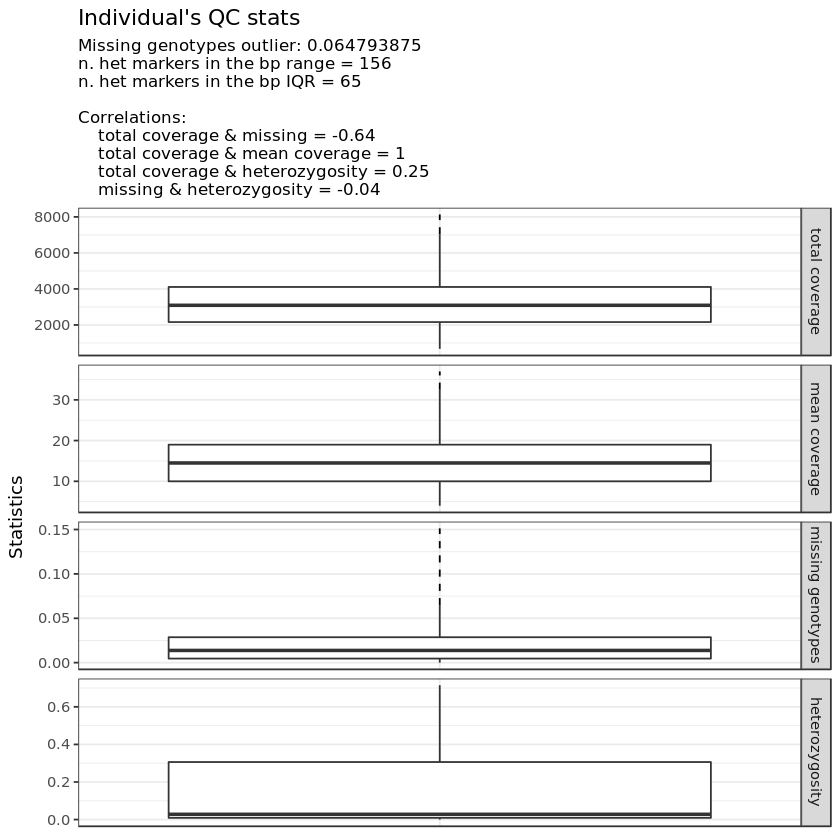

############################## completed read_vcf ##############################


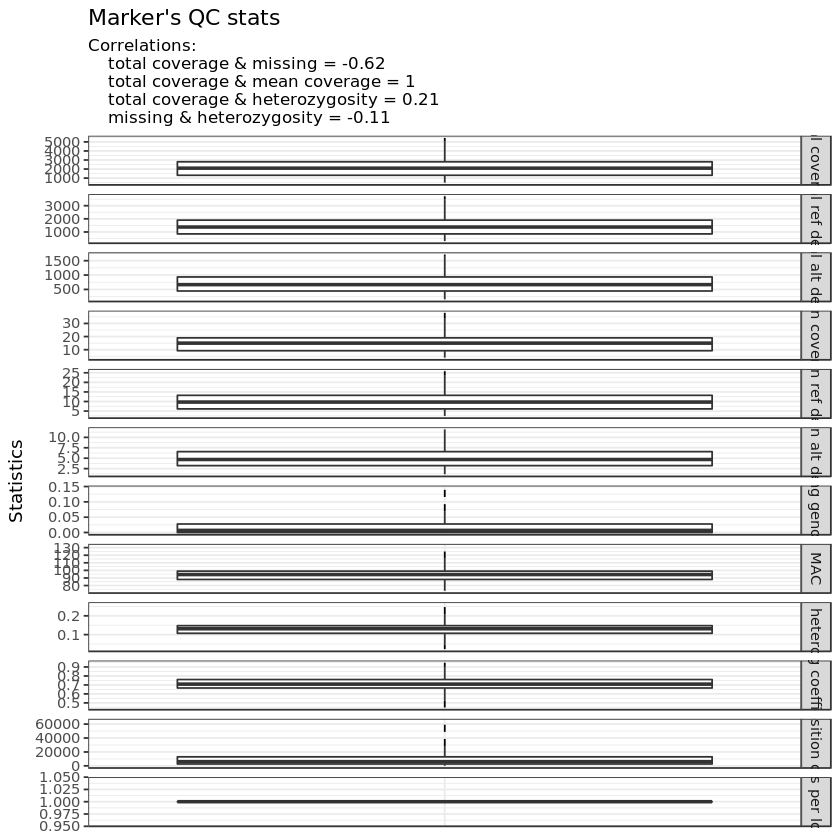

In [16]:
%expand
data = read_vcf("../Analysis/pc12_95-fixed/pc12_95-fixed.recode.vcf", strata = "../../NFLDB.strata",
        vcf.stats = TRUE, parallel.core = 4, filter.common.markers = F, pop.levels=c("NB","DB","FL","ILMB") )


In [17]:
outs = genomic_converter(data, strata="../../NFLDB.strata", 
                  output = c("genind","structure"),
                 parallel.core = 4, filename = "pc12_95-fixed",pop.levels=c("NB","DB","FL","ILMB"))

################################################################################
########################## radiator::genomic_converter #########################
################################################################################


Execution date@time: 20191007@1134

Deprecated arguments identified inside "...": 
    pop.levels

Read documentation, for latest changes, and modify your codes!

Folder created: 08_radiator_genomic_converter_20191007@1134
Function call and arguments stored in: radiator_genomic_converter_args_20191007@1134.tsv
Filters parameters file generated: filters_parameters_20191007@1134.tsv

Importing data

Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144

Writing tidy data set:
pc12_95-fixed.rad

Preparing data for output

Data is bi-allelic
Calibrating REF/ALT alleles...
    number of REF/ALT switch = 0
Generating structure file
Generating adegenet genind object


################################### RESULTS ####################################


Data format of input: SeqVarGDSClass
Biallelic data
Number of markers: 218
Number of chromosome/contig/scaffold: 1
Number of strata: 4
Number of individuals: 144

Computation time, overall: 2 sec


######################### genomic_converter completed ##########################


In [18]:
outs$genind

/// GENIND OBJECT /////////

 // 144 individuals; 218 loci; 436 alleles; size: 410.1 Kb

 // Basic content
   @tab:  144 x 436 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 436 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input, write = TRUE)

 // Optional content
   @pop: population of each individual (group size range: 29-44)
   @strata: a data frame with 2 columns ( INDIVIDUALS, POP_ID )

In [19]:
d = outs$genind
save(d, file="../Analysis/pc12_95-fixed/pc12_95-fixed.genind")

## Structure file with pure references


In [3]:
%expand
#don't need
purefile = open("{suffix}../Analysis/Pure_NFLDB.tsv","r")
str_in = open("{suffix}../Analysis/allfiltu/allfiltu_pflag.str","r")
str_out = open("{suffix}../Analysis/allfiltu/allfiltu_pflagPureB.str","w")

keep = []
next(purefile)
next(purefile)
for line in purefile:
    keep.append(line.split("\t")[0])
purefile.close()

str_out.write(str_in.readline())
for line in str_in:
    stuff = line.split("\t")
    if stuff[0] not in keep:
        stuff[2] = "0"
        if stuff[1] == "1":
            stuff[1] = "5"
        if stuff[1] == "2":
            stuff[1] = "6"
        if stuff[1] == "3":
            stuff[1] = "7"
    else:
        stuff[2] = "1"
    str_out.write("\t".join(stuff))

str_in.close()
str_out.close()

In [5]:
%expand
#don't need
purefile = open("{suffix}../Analysis/Pure_NFLDB-fixed2_90.tsv","r")
str_in = open("{suffix}../Analysis/allfiltu/all","r")
str_out = open("{suffix}../Analysis/pc12_95-fixed/pc12_95-fixed_pflagPureB.str","w")

keep = []
next(purefile)
next(purefile)
for line in purefile:
    keep.append(line.split("\t")[0])
purefile.close()

str_out.write(str_in.readline())
for line in str_in:
    stuff = line.split("\t")
    if stuff[0] not in keep:
        stuff[2] = "0"
        if stuff[1] == "1":
            stuff[1] = "5"
        if stuff[1] == "2":
            stuff[1] = "6"
        if stuff[1] == "3":
            stuff[1] = "7"
    else:
        stuff[2] = "1"
    str_out.write("\t".join(stuff))

str_in.close()
str_out.close()

In [3]:
%expand
purefile = open("{suffix}../Analysis/Pure_NFLDB_allfiltu955.tsv","r")
str_in = open("{suffix}../Analysis/fixed2_90u_pc12_90/pc12_90-fixed2_90_pflag.str","r")
str_out = open("{suffix}../Analysis/fixed2_90u_pc12_90/pc12_90-fixed2_90_pflagPure95.str","w")

keep = []
next(purefile)
next(purefile)
for line in purefile:
    keep.append(line.split("\t")[0])
purefile.close()

str_out.write(str_in.readline())
for line in str_in:
    stuff = line.split("\t")
    if stuff[0] not in keep:
        stuff[2] = "0"
    else:
        stuff[2] = "1"
    str_out.write("\t".join(stuff))

    

str_in.close()
str_out.close()

In [ ]:
# editing black bass panel
for line in str_in:
    stuff = line.split("\t")
    if stuff[1] != "7":
        stuff.insert(2,"1")
    else:
        stuff.insert(2,"0")
    str_out.write("\t".join(stuff))


In [6]:
%expand
purefile = open("{suffix}../Analysis/Pure_NFLDB.tsv","r")
str_in = open("{suffix}../Analysis/pc12_95-fixed/pc12_95-fixed_pflag.str","r")
str_out = open("{suffix}../Analysis/pc12_95-fixed/pc12_95-fixed_pflagPure.str","w")

keep = []
next(purefile)
next(purefile)
for line in purefile:
    keep.append(line.split("\t")[0])
purefile.close()

str_out.write(str_in.readline())
for line in str_in:
    stuff = line.split("\t")
    if stuff[0] not in keep:
        stuff[2] = "0"
    else:
        stuff[2] = "1"
    str_out.write("\t".join(stuff))

str_in.close()
str_out.close()

In [21]:
keep

['CANOT-11830',
 'CANOT-11832',
 'CANOT-2617',
 'CANOT11829',
 'CANOT11837',
 'CANOT11838',
 'DB-2592',
 'DB-2593',
 'DB-2637',
 'DB12041',
 'DB2589',
 'DB2590',
 'DB2634',
 'DB2635',
 'SIPS-26',
 'TN11851',
 'TN11855',
 'FL01',
 'FL09',
 'FL12',
 'FL15',
 'FL16',
 'FL20',
 'FL21',
 'FL23',
 'FL30',
 'FL55',
 'FL60',
 'FL64',
 'FL68',
 'FL70',
 'FL71',
 'FL72',
 'FL73',
 'FLAL01',
 'FLAL01II',
 'FLAL02',
 'FLAL02II',
 'FLAL03',
 'FLAL03',
 'FLAL04',
 'FLAL04II',
 'FLF17',
 'FLM10',
 'FLM12',
 'FLM13',
 'FLM15',
 'MATT-01',
 'MATT-02',
 'MATT-06',
 'Mill-18',
 'NB11',
 'NB12',
 'NB13',
 'NB19',
 'NBM01',
 'Otter-13',
 'Otter-4',
 'SL04',
 'SL10',
 'SL11',
 'SL14',
 'SL15',
 'SL16',
 'SL19',
 'SL2',
 'SL8']

## Fixed within all pops

In [269]:
import pandas as pd
infile ="./maf05mac4het9m3R50_2/populations.sumstats.tsv"

IN = pd.read_table(infile,header=4)

In [85]:
IN.dtypes

# Locus ID                int64
Chr                       int64
BP                        int64
Col                       int64
Pop ID                   object
P Nuc                    object
Q Nuc                    object
N                         int64
P                       float64
Obs Het                 float64
Obs Hom                 float64
Exp Het                 float64
Exp Hom                 float64
Pi                      float64
Smoothed Pi             float64
Smoothed Pi P-value     float64
Fis                     float64
Smoothed Fis            float64
Smoothed Fis P-value    float64
HWE P-value             float64
Private                   int64
dtype: object

In [270]:
#movies[(movies.duration >= 200) & (movies.genre == 'Drama')]
fixed = IN[((IN['P'] >0.98) | (IN['P'] < 0.02)) & (IN['Pop ID'] != "ILMB")]

In [272]:
fixed.iloc[0:20]

,# Locus ID,Chr,BP,Col,Pop ID,P Nuc,Q Nuc,N,P,Obs Het,...,Exp Het,Exp Hom,Pi,Smoothed Pi,Smoothed Pi P-value,Fis,Smoothed Fis,Smoothed Fis P-value,HWE P-value,Private
5,178,18,2739,90,FL,A,-,29,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.0,0.00000,0.0,1.0,0
9,179,18,2739,30,FL,T,-,28,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.0,0.00000,0.0,1.0,0
12,183,18,10128,74,DB,A,-,29,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.0,0.00000,0.0,1.0,0
14,183,18,10128,74,NB,A,-,40,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.0,0.00000,0.0,1.0,0
16,185,18,10128,32,DB,T,-,29,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.0,0.00000,0.0,1.0,0
18,185,18,10128,32,NB,T,-,41,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.0,0.00000,0.0,1.0,0
21,193,21,2687,28,FL,G,-,29,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.0,0.00000,0.0,1.0,0
22,193,21,2687,28,NB,G,-,42,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.0,0.00000,0.0,1.0,0
24,193,21,2702,43,DB,T,C,29,0.982759,0.03448,...,0.03389,0.96611,0.03448,0.00113,0.0,-0.0,0.03734,0.0,1.0,0
26,193,21,2702,43,NB,T,-,42,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.0,0.00000,0.0,1.0,0


In [279]:
check ={}
alt = {}
fix3Loc = []
inds = []
ind_check = []
for row in fixed.itertuples(index=True):
    if (row._1,row.Chr,row.BP) not in check.keys():
        check[(row._1,row.Chr,row.BP)] = 1
        alt[(row._1,row.Chr,row.BP)] = [row.P]
    else:
        check[(row._1,row.Chr,row.BP)] += 1
        alt[(row._1,row.Chr,row.BP)].append(row.P)
        if check[(row._1,row.Chr,row.BP)] == 3:
            if any(i < 0.02 for i in alt[(row._1,row.Chr,row.BP)]):
                fix3Loc.append((row.Chr,row.BP))
          

In [280]:
len(fix3Loc)

3749

In [281]:
x = IN[IN[["Chr","BP"]].apply(tuple, 1).isin(fix3Loc)]

In [282]:
x[0:20]

,# Locus ID,Chr,BP,Col,Pop ID,P Nuc,Q Nuc,N,P,Obs Het,...,Exp Het,Exp Hom,Pi,Smoothed Pi,Smoothed Pi P-value,Fis,Smoothed Fis,Smoothed Fis P-value,HWE P-value,Private
67,267,23,27403,15,ILMB,C,T,28,0.535714,0.50000,...,0.49745,0.50255,0.50649,0.00083,0.0,0.01282,0.01711,0.0,1.00000,0
68,267,23,27403,15,DB,C,-,21,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
69,267,23,27403,15,FL,-,T,13,0.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
70,267,23,27403,15,NB,C,-,23,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
139,436,38,5204,61,ILMB,G,C,43,0.848837,0.20930,...,0.25663,0.74337,0.25964,0.00139,0.0,0.19389,0.19389,0.0,0.22263,0
140,436,38,5204,61,DB,G,-,26,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
141,436,38,5204,61,FL,G,-,27,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
142,436,38,5204,61,NB,G,C,30,0.016667,0.03333,...,0.03278,0.96722,0.03333,0.00013,0.0,-0.00000,-0.00000,0.0,1.00000,0
299,1109,131,8235,38,ILMB,A,G,21,0.642857,0.14286,...,0.45918,0.54082,0.47038,0.00197,0.0,0.69630,0.34836,0.0,0.00203,0
300,1109,131,8235,38,DB,A,-,24,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0


In [116]:
%expand
x[["# Locus ID","Chr","BP","Pop ID","N","P"]].to_csv("{suffix}testfixed3.txt",sep="\t", index=False)

In [283]:
%expand
positions = []
OUT = open("{suffix}fixed3.positions","w")
OUTr = open("{suffix}fixed3_R.positions","w")
OUTr.write("LOCUS\tPOS\n")
n=0
for (Chr,BP) in fix3Loc:
    if (Chr, BP) not in positions:
        positions.append((Chr, BP))
        OUT.write(str(Chr)+"\t"+str(BP)+"\n")
        OUTr.write(str(Chr)+"\t"+str(BP)+"\n")
        n+=1
OUT.close()
OUTr.close()
print(n)

2838


In [284]:
%expand
module load vcftools/v0.1.17

vcftools --vcf {suffix}m85-hwPbi.recode.vcf --recode \
--recode-INFO-all --positions {suffix}fixed3.positions \
--out {suffix}m85-hwPBi-fixed3


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ./maf05mac4het9m3R50_2/Making/m85-hwPbi.recode.vcf
	--recode-INFO-all
	--out ./maf05mac4het9m3R50_2/Making/m85-hwPBi-fixed3
	--positions ./maf05mac4het9m3R50_2/Making/fixed3.positions
	--recode

After filtering, kept 144 out of 144 Individuals
Outputting VCF file...
After filtering, kept 1456 out of a possible 15078 Sites
Run Time = 3.00 seconds


Execution date@time: 20191010@1141
Folder created: read_vcf_20191010@1141
Function call and arguments stored in: radiator_read_vcf_args_20191010@1141.tsv
File written: random.seed (716045)

Reading VCF
Data summary: 
    number of samples: 144
    number of markers: 2435
done! timing: 2 sec


File written: radiator_20191010@1141.gds

Analyzing the data...
VCF source: Stacks v2.4
Data is bi-allelic
Cleaning VCF's sample names
Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144
Reads assembly: de novo
Filters parameters file generated: filters_parameters_20191010@1141.tsv
Filters parameters file: initiated and updated


################################################################################
########################### radiator::filter_monomorphic #######################
################################################################################


Execution date@time: 20191010@1141
Function call and arguments stored in: radiator_filter_monomorphic_args_20191010@1141.tsv
Filters parameters file: initiated
File written: whitelist.polymorphic.markers_20191010@1141.tsv
Filters parameters file: updated


################################### RESULTS ####################################



Filter monomorphic markers
Number of individuals / strata / chrom / locus / SNP:
    Before: 144 / 4 / 1 / 1917 / 2435
    Blacklisted: 0 / 0 / 0 / 0 / 0
    After: 144 / 4 / 1 / 1917 / 2435

Computation time, overall: 0 sec


######################## filter_monomorphic completed ##########################



Preparing output files...
File written: whitelist.markers.tsv
Writing the filtered strata: strata.filtered.tsvstrata.filtered.tsv

Generating statistics after filtering
Generating individual stats...
File written: individuals qc info and stats summary
File written: individuals qc plot
Generating markers stats...


################################### SUMMARY ####################################




Summary (AFTER filtering):
Missing data: 
    markers: 0.05
    individuals: 0.05


Coverage info:
    individuals mean read depth: 25962
    individuals mean genotype coverage: 11
    markers mean coverage: 11


Number of chromosome/contig/scaffold: 1
Number of locus: 1917
Number of markers: 2435
Number of populations: 4
Number of individuals: 144

Number of ind/pop:
ILMB = 44
DB = 29
FL = 29
NB = 42

Number of duplicate id: 0
radiator Genomic Data Structure (GDS) file: radiator_20191010@1141.gds

Computation time, overall: 8 sec


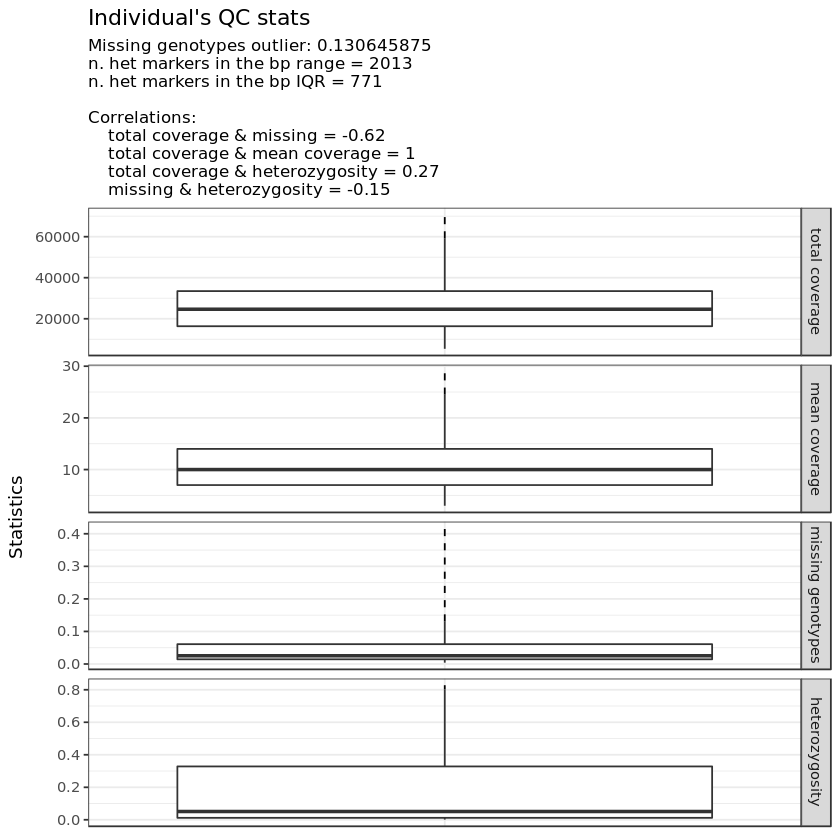

############################## completed read_vcf ##############################


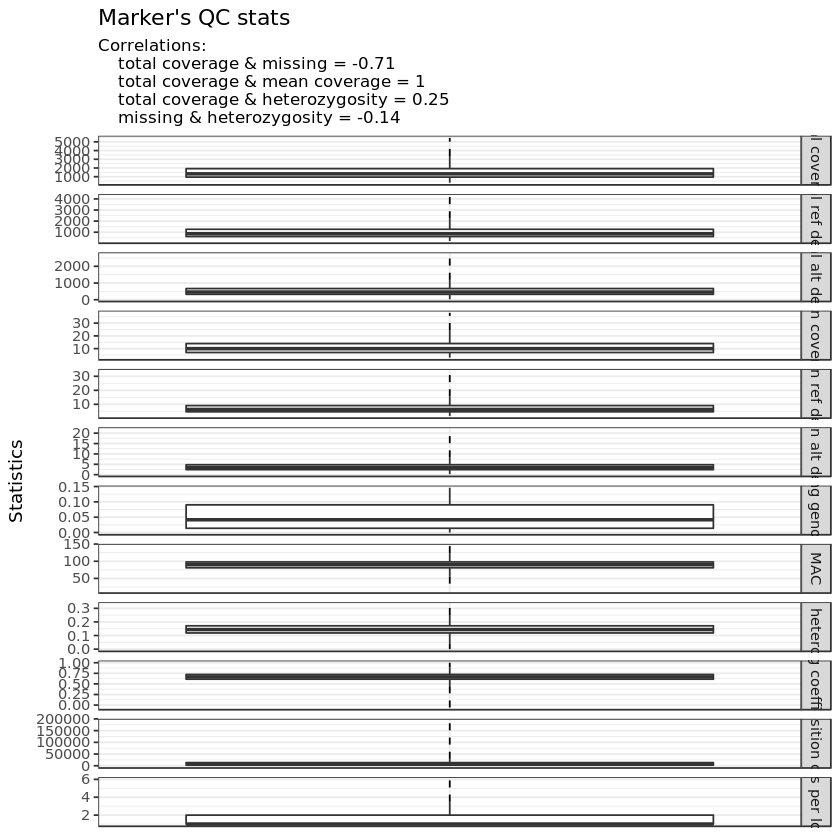

In [226]:
%expand
data = read_vcf("m85-hwPBi-fixed2_98.recode.vcf", strata = "../../NFLDB.strata",
        vcf.stats = TRUE, parallel.core = 4, filter.common.markers = F)


In [ ]:
#dataLD = filter_ld(data, interactive.filter = F, filter.short.ld = "mac",
#  filter.long.ld = 0.7, parallel.core = 4, long.ld.missing = TRUE,
#  filename = "filtered_hwld")

In [ ]:
genomic_converter(dataLD, strata="../../NFLDB.strata", 
                  output = c("genind","structure","vcf"),
                 parallel.core = 4, filename = "hwp3t1ld7")

In [285]:
%expand
module load tabix/0.2.6
module load samtools/1.6

bgzip {suffix}m85-hwPBi-fixed3.recode.vcf 
tabix -p vcf {suffix}m85-hwPBi-fixed3.recode.vcf.gz

In [286]:
%expand
module load bcftools/1.3.2

bcftools +prune {suffix}m85-hwPBi-fixed3.recode.vcf.gz -l 0.2 -n 1 -w 10000 \
-Ov -o {suffix}m85-hwPBi-fixed3-thinned.vcf
grep -v "#" {suffix}m85-hwPBi-fixed3-thinned.vcf | wc -l

1184


Execution date@time: 20191010@1619
Folder created: read_vcf_20191010@1619
Function call and arguments stored in: radiator_read_vcf_args_20191010@1619.tsv
File written: random.seed (990023)

Reading VCF
Data summary: 
    number of samples: 144
    number of markers: 1184
done! timing: 3 sec


File written: radiator_20191010@1619.gds

Analyzing the data...
VCF source: Stacks v2.4
Data is bi-allelic
Cleaning VCF's sample names
Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144
Reads assembly: de novo
Filters parameters file generated: filters_parameters_20191010@1619.tsv
Filters parameters file: initiated and updated


################################################################################
########################### radiator::filter_monomorphic #######################
################################################################################


Execution date@time: 20191010@1619
Function call and arguments stored in: radiator_filter_monomorphic_args_20191010@1619.tsv
Filters parameters file: initiated
File written: whitelist.polymorphic.markers_20191010@1619.tsv
Filters parameters file: updated


################################### RESULTS ####################################



Filter monomorphic markers
Number of individuals / strata / chrom / locus / SNP:
    Before: 144 / 4 / 1 / 1184 / 1184
    Blacklisted: 0 / 0 / 0 / 0 / 0
    After: 144 / 4 / 1 / 1184 / 1184

Computation time, overall: 0 sec


######################## filter_monomorphic completed ##########################



Preparing output files...
File written: whitelist.markers.tsv
Writing the filtered strata: strata.filtered.tsvstrata.filtered.tsv

Generating statistics after filtering
Generating individual stats...
File written: individuals qc info and stats summary
File written: individuals qc plot
Generating markers stats...


################################### SUMMARY ####################################




Summary (AFTER filtering):
Missing data: 
    markers: 0.05
    individuals: 0.05


Coverage info:
    individuals mean read depth: 12502
    individuals mean genotype coverage: 11
    markers mean coverage: 11


Number of chromosome/contig/scaffold: 1
Number of locus: 1184
Number of markers: 1184
Number of populations: 4
Number of individuals: 144

Number of ind/pop:
NB = 42
DB = 29
FL = 29
ILMB = 44

Number of duplicate id: 0
radiator Genomic Data Structure (GDS) file: radiator_20191010@1619.gds

Computation time, overall: 13 sec


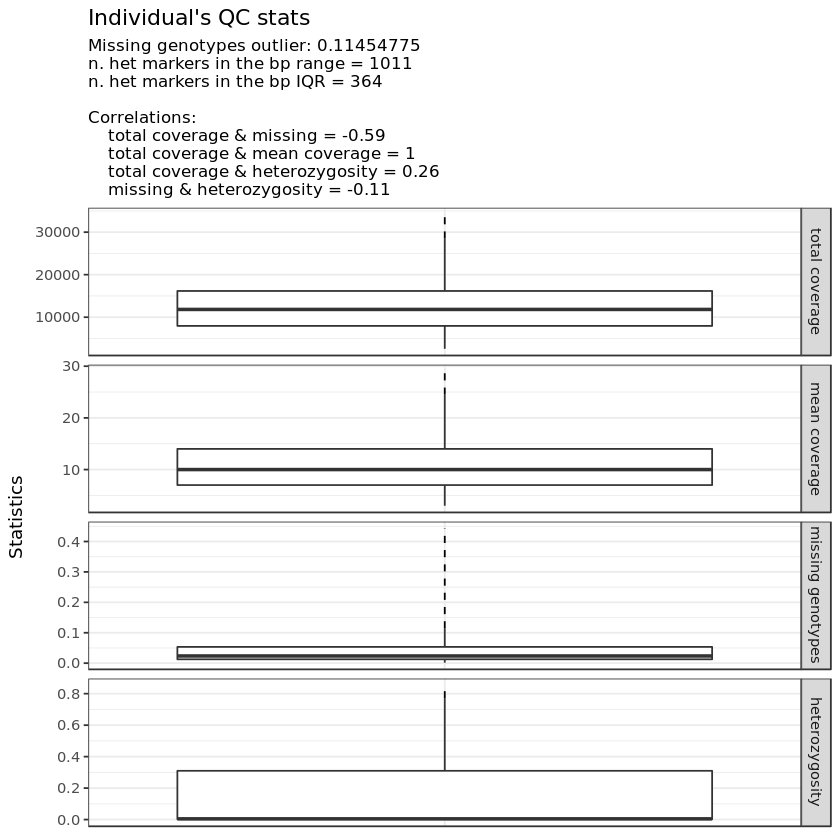

############################## completed read_vcf ##############################


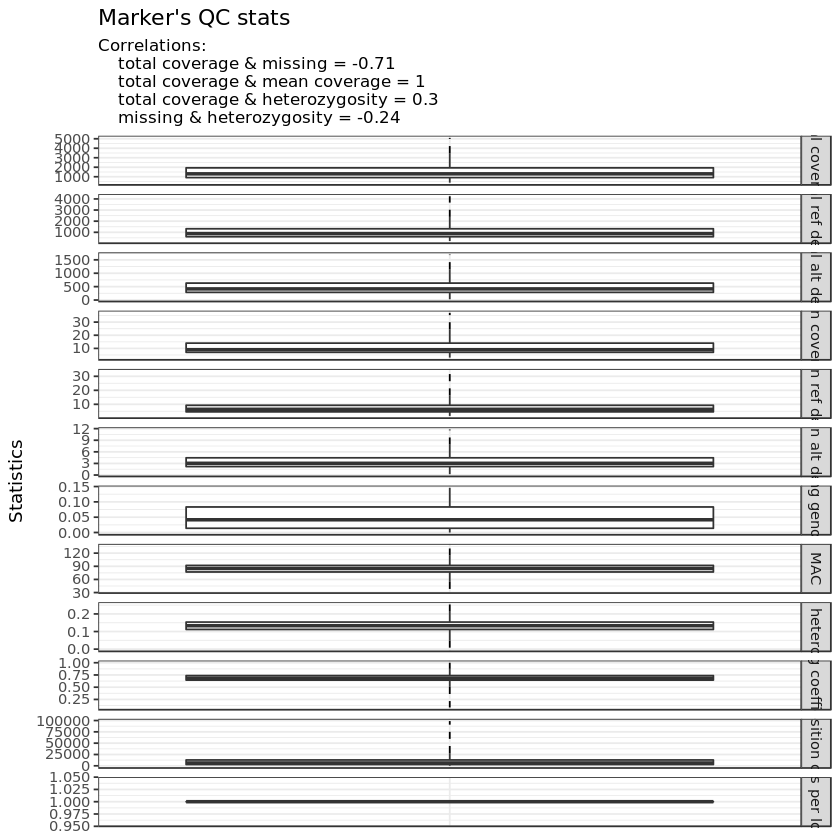

In [287]:
data = read_vcf("m85-hwPBi-fixed3-thinned.vcf", strata = "../../NFLDB.strata",
        vcf.stats = TRUE, parallel.core = 4, filter.common.markers = F,pop.levels=c("NB","DB","FL","ILMB"))


In [291]:
outs = genomic_converter(data, strata="../../NFLDB.strata", 
                  output = c("genind","structure"),
                 parallel.core = 4, filename = "fixed3u",pop.levels=c("NB","DB","FL","ILMB") )

################################################################################
########################## radiator::genomic_converter #########################
################################################################################


Execution date@time: 20191010@1622

Deprecated arguments identified inside "...": 
    pop.levels

Read documentation, for latest changes, and modify your codes!

Folder created: 14_radiator_genomic_converter_20191010@1622
Function call and arguments stored in: radiator_genomic_converter_args_20191010@1622.tsv
Filters parameters file generated: filters_parameters_20191010@1622.tsv

Importing data

Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144

Writing tidy data set:
fixed3u.rad

Preparing data for output

Data is bi-allelic
Calibrating REF/ALT alleles...
    number of REF/ALT switch = 0
Generating structure file
Generating adegenet genind object


################################### RESULTS ####################################


Data format of input: SeqVarGDSClass
Biallelic data
Number of markers: 1184
Number of chromosome/contig/scaffold: 1
Number of strata: 4
Number of individuals: 144

Computation time, overall: 12 sec


######################### genomic_converter completed ##########################


In [289]:
outs$genind

/// GENIND OBJECT /////////

 // 144 individuals; 1,184 loci; 2,368 alleles; size: 2 Mb

 // Basic content
   @tab:  144 x 2368 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 2368 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input, write = TRUE)

 // Optional content
   @pop: population of each individual (group size range: 29-44)
   @strata: a data frame with 2 columns ( INDIVIDUALS, POP_ID )

In [290]:
d = outs$genind
save(d, file="fixed3u.genind")

### Making inputs in R

In [2]:
getwd()

[1] "/gpfs01/home/kes0132/Delta/Stacks_Assembly/MyStacks"

In [5]:
%expand
setwd("{suffix}")
library(radiator)
library(adegenet)

Loading required package: ade4

   /// adegenet 2.1.1 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()




In [ ]:
%expand
setwd("{suffix}")
data <- radiator::filter_rad(
    data = "./maf05mac4het9m3R50_2/populations.snps.vcf",
    strata = "../../NFLDB.strata", 
    output = c("genind")
    )

In [ ]:
whitelist.markers = "fixed_R.positions",

Execution date@time: 20190926@1205
Folder created: read_vcf_20190926@1205
Function call and arguments stored in: radiator_read_vcf_args_20190926@1205.tsv
File written: random.seed (246505)

Reading VCF
Data summary: 
    number of samples: 144
    number of markers: 4995
done! timing: 3 sec


File written: filtered_20190926@1205.gds

Analyzing the data...
VCF source: Stacks v2.4
Data is bi-allelic
Cleaning VCF's sample names
Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144
Reads assembly: de novo
Filters parameters file generated: filters_parameters_20190926@1205.tsv
Filters parameters file: initiated and updated


################################################################################
########################### radiator::filter_monomorphic #######################
################################################################################


Execution date@time: 20190926@1205
Function call and arguments stored in: radiator_filter_monomorphic_args_20190926@1205.tsv
Filters parameters file: initiated
File written: whitelist.polymorphic.markers_20190926@1205.tsv
Filters parameters file: updated


################################### RESULTS ####################################



Filter monomorphic markers
Number of individuals / strata / chrom / locus / SNP:
    Before: 144 / 4 / 1 / 2622 / 4995
    Blacklisted: 0 / 0 / 0 / 0 / 0
    After: 144 / 4 / 1 / 2622 / 4995

Computation time, overall: 0 sec


######################## filter_monomorphic completed ##########################
################################################################################
######################### radiator::filter_genotyping ##########################
################################################################################


Execution date@time: 20190926@1205
Function call and arguments stored in: radiator_filter_genotyping_args_20190926@1205.tsv
Importing data ...
Filters parameters file: initiated
Generating statistics
Generating missingness/genotyping helper table...


ERROR: Error in is_missing(.key): object 'id.select' not found



Computation time, overall: 1 sec


######################## completed filter_genotyping ###########################



Computation time, overall: 4 sec


############################## completed read_vcf ##############################


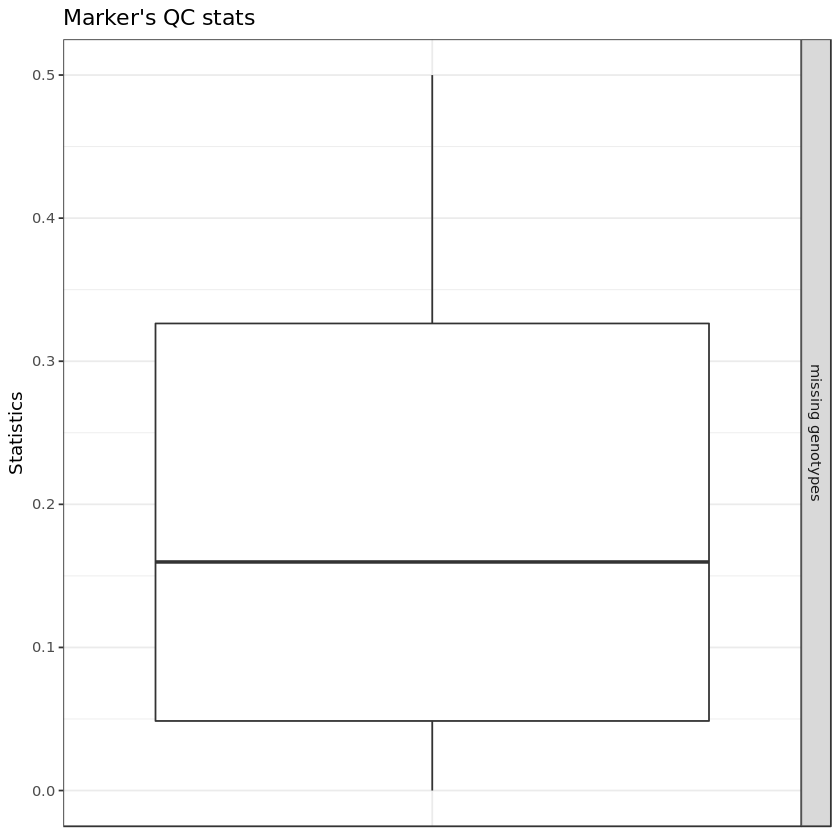

In [11]:
%expand
data = read_vcf("../../Silliman_subset//sub_populations.snps.vcf", strata = "../../NFLDB.strata",
        vcf.stats = TRUE, 
  parallel.core = 4, filter.common.markers = F, filter.genotyping = 15, filename= "filtered")


In [ ]:
dataHW = filter_hwe(data,interactive.filter=F, strata= "../../NFLDB.location.strata"
                   hw.pop.threshold=3, midp.threshold = 1, parallel.core = 4, 
                    filename="filtered_hwe")

In [ ]:
dataHWLD = filter_ld(dataHW, interactive.filter = F, filter.short.ld = "mac",
  filter.long.ld = 0.7, parallel.core = 4, long.ld.missing = TRUE,
  filename = "filtered_hwld")

In [ ]:
genomic_converter(dataHWLD, strata="../../NFLDB.strata", 
                  output = c("genind","structure","vcf"),
                 parallel.core = 4, filename = "hwp3t1ld7")

### Population Structure